# Object Detection (객체탐지)


사전 완료 된 사항 
- 코랩에서 학습 한 뒤 가중치(weights)와 cfg 파일을 내려받음 

---

**Image & Video detection 시 실행 해야하는 사전 코드** 

1.   필요한 Module import 

In [ ]:
import cv2
import numpy as np 

2. 라벨링 객체 선언하기

In [ ]:
# 라벨링 되어있는 폴더의 classes.txt 안에 라벨내용 글씨그대로(대소문자주의)가져와야합니다. 
# 이미지 & 영상 화면에 박싱할 때 해당 라벨명을 사용함 
LABELS = ['Budgerigar',
'Cockatiel',
'hoopoe',
'Corvus',
'Passer',
'Agapornis'
]

3. confidence & threshold 수치 선언 

In [ ]:
# object detection 하려는 사물 정확도 확률에 대한 임계치 정보
# 다른 객체를 자꾸 탐지하게 된다면 confidence 값과 threshold 값을 올려볼 수 있다.(신뢰도를 올리는 방법 ) 
# CONFIDENSE : 사물이 맞을 확률에 대한 임계치 
# THRESHOLD : 박스안에 사물이 있을 확률에 대한 임계치 (NMS: 예측한 바운딩박스중 정확한것 선택 0~1사이의값 )

CONFIDENCE = 0.3  
THRESHOLD = 0.3 

4. 코랩에서 학습시킨  cfg ,가중치 파일 불러오기 

In [1]:
net = cv2.dnn.readNetFromDarknet('C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\yolov4_custom.cfg',
                                 'C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\yolov4_custom_last.weights')

## 사전사항 full code 

In [8]:
import cv2
import numpy as np

LABELS = ['Budgerigar',
'Cockatiel',
'hoopoe',
'Corvus',
'Passer',
'Agapornis'
]

CONFIDENCE = 0.3  
THRESHOLD = 0.3 

net = cv2.dnn.readNetFromDarknet('C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\yolov4_custom.cfg',
                                 'C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\yolov4_custom_last.weights')

## Image 

In [20]:
def image_detection():     # 이미지 경로
    
    detection_imag_path = input("1. detection test 할 이미지 경로 입력하세요: \n(주의:경로 역슬러쉬 두번 들어가야 합니다.)\n")
    result_name = input("\n2. detection 한 결과 저장할 이미지명 입력하세요 : ")
    
    img = cv2.imread(detection_imag_path) # 이미지 읽기 (수치화)
    H, W, _ = img.shape 
    
    # 이미지를 리사이즈, 정규화 & 신경망에 흘려보내기 
    blob = cv2.dnn.blobFromImage(img, scalefactor=1/255., size=(416, 416), swapRB=True)
    net.setInput(blob) 
    output = net.forward() 

    boxes, confidences, class_ids = [], [], []
  
    for det in output:         
        box = det[:4]     
        scores = det[5:]        
        class_id = np.argmax(scores) 
        confidence = scores[class_id] 
    
        if confidence > CONFIDENCE:
            cx, cy, w, h = box * np.array([W, H, W, H])
            x = cx - (w / 2)
            y = cy - (h / 2)
            boxes.append([int(x), int(y), int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)
    

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)
    
    if len(idxs) > 0: # confidence 가 0.3 보다 크면  
        for i in idxs.flatten():
            x, y, w, h = boxes[i] # BOXES 리스트의 정보 (x,y,w,h)
            cv2.rectangle(img, pt1=(x, y), pt2=(x + w, y + h), color=(0, 255,0), thickness=1)
            
            # 박스 위에 추축한 classes text 출력 
            cv2.putText(img, 
                        text='%s %.2f %d' % (LABELS[class_ids[i]], confidences[i], w),
                        org=(x, y -6 ), 
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=0.5, 
                        color=(255, 0, 0), 
                        thickness=2)
    
    # 디텍션한 결과를 저장하기 
    cv2.imwrite('C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\result\\%s.png'%result_name, img)
    print("\nfinish")

In [17]:
# 디텍션 실행 
image_detection()

1. etection test 할 이미지 경로 입력하세요: 
(주의:경로 역슬러쉬 두번 들어가야 합니다.)
C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\test\\test5.jpg

2. detection 한 결과 이미지명 입력하세요 : test5_result

finish


## Video

In [21]:
def video_detection() : 
    # 원본 동영상 위치와 이름 경로 
    detection_video_path = input("1. vedio_detection test 할 비디오 경로 입력하세요: \n(주의:경로 역슬러쉬 두번 들어가야 합니다.)\n")
    result_name = input("\n2. vedio_detection 한 결과 저장할 비디오명 입력하세요 : \n(비디오 저장형식은 mp4 로 저장됩니다.\n)")
    
    cap = cv2.VideoCapture(detection_video_path)

    font = cv2.FONT_HERSHEY_PLAIN # 동영상 디텍션시 나타나는 폰트 
    colors = np.random.uniform(0, 255, size=(100, 3)) # 글씨 색상 

    # 동영상 프레임 안에 가로, 세로 사이즈 변수( frame_size) 담기
    frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 동영상형식 : mp4  
    fps = cap.get(cv2.CAP_PROP_FPS) # 동영상 원본 (cap)을 초당 프레임단위로 가져오기

    # 결과 동영상의 저장될 최종 위치 
    out = cv2.VideoWriter('C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\result\\%s.mp4'%result_name, 
                          fourcc,  # 저장형식
                          fps,     
                          (int(frame_size[0]), 
                           int(frame_size[1])))

    while True:
         # 동영상에서 frame 을 가져와 img 에 담기 ret 은 True 할당 
         #(가져오기만하면 나중에 루프 끝나기 위한 값 )
        ret, img = cap.read()
        print(img)
        if not ret: # True 가 끝나면 (=Flase이면) 루프문 종료 
            break

        # 동영상의 frame 에 대해서 넓이와 높이 구해야 하므로 cv2.CAP_PROP_FRAME_WIDTH 와 cv2.CAP_PROP_FRAME_HEIGHT 를 이용 
        width,height = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # 정규화 (학습데이터와 맞춤) RGB 로 학습했음으로 swapRB = True(BGR 변경)
        blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

        # 다크넷(net)신경망에 전처리된 blob frame 을 넣기 (setinput)  
        net.setInput(blob)

        # 다크넷 신경망에서 맨 마지막층들의 이름가져오기 output_layers_names   
        output_layers_names = net.getUnconnectedOutLayersNames()

        # forward 신경망 
        layerOutputs = net.forward(output_layers_names)

        # 사물 검출을시 사용할 비어있는 리스트 3개 선언 
        boxes,confidences,class_ids = [],[],[]

        for output in layerOutputs: # 507 개의 박스데이터 불러오기 
            
            # 밑의 4줄의 코드 : 박스의 원본사이즈를 구하는 코드 
            for detection in output: # list 안의list 라 이중 loop 문 구성 했음 
                scores = detection[5:] # 507 개의 박스에서 각 클래스의 확률 담음 
                class_id = np.argmax(scores) # 가장 큰 확률(argmax) 인덱스 class_id 담기
                confidence = scores[class_id] # 가장 추출된 인덱스의 의 확률값을 confidence 에 담기

                if confidence > CONFIDENCE: # confidece 의 값이 CONFIDENCE(위에 값 줌) 보다 크다면 (사물이 있을 확률 박스를 담아내기 위한 코드)
                    
                    # 0~ 1 사이로 변경된 좌표값을 실제 좌표로 변경
                    center_x = int(detection[0]*width)  
                    center_y = int(detection[1]*height)
                    
                    # 실제 가로 , 높이 로 변경
                    w = int(detection[2]*width) 
                    h = int(detection[3]*height) 

                    # 박스의 중심 x 좌표 ,y 좌표 
                    x = int(center_x - w/2) 
                    y = int(center_y - h/2) 

                    boxes.append([x, y, w, h]) # 원하는 사물이 있는 박스정보를 boxes 에 넣기 
                    confidences.append((float(confidence))) #  CONFIDENCE값 보다 큰 확률 데이터를 confidece 에 넣기
                    
                    class_ids.append(class_id)

        # 해당 임계치(CONFIDENCE,THRESHOLD) 보다 더 큰 박스 정보들만 indexes 에 담기 
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)

        if len(indexes) > 0: # indexes 에 값이 존재하면
            for i in indexes.flatten(): # boxes 리스트에 (x,y,w,h) 에 대한 정보를 
                x, y, w, h = boxes[i]   # x ,y,w,h 에 넣습니다. 
                label = str(LABELS[class_ids[i]])# 클래스 label 넣고 
                confidence = str(round(confidences[i],2)) # 각클래스일 확률을 confidece 에 넣고 
                color = colors[i] # i 의 값에 따라 색상이 달라짐 
                cv2.rectangle(img, (x,y), (x+w, y+h), color, 2) # 박싱해주는 과정 
                # 박스를 그리는데 pt1 에 중심좌표를 두고 pt2 에는 
                # 중심좌표로부터의 넓이와 높이 정보를 주고 선두께를 2로 하여 그린다. 

                # cv2.putText 를 이용하여 라벨과 확률을 중심좌표에서 y 축으로 +20 지점에 표시한다
                cv2.putText(img, 
                            label + " " + confidence, 
                            (x, y+20), 
                            font,
                            2, 
                            (255,255,255),
                            2)

        # 동영상 frame 마다 표시되는 속도로 play 하기 
        cv2.imshow('Image', img) # img 가 프레임 (속도가 좀 느림 )

        # 동영상을 아까 저장할 경로와 지정해놓은 out 객체에 프레임을 write(기록) 한다. 
        out.write(img)

        # cv2.waitKey(1) 은 입력을 기다리는 대기 함수 
        key = cv2.waitKey(1)
        if key==27: # 취소키를 누르면 (27)
            break   # 멈춘다. 


    out.release()    # 디텍션된 동영상에 대한 데이터가 있는 변수 지움     
    cv2.destroyAllWindows() # 열어 놓은 윈도우(프레임당 움직이고있는)창 닫기
    
    print("detection finish")

In [22]:
video_detection()

1. vedio_detection test 할 이미지 경로 입력하세요: 
(주의:경로 역슬러쉬 두번 들어가야 합니다.)
C:\\deeplearning\\[Portfolio]\\Birds_ObDetection\\test\\test_video1.mp4

2. vedio_detection 한 결과 저장할 비디오명 입력하세요 : 
(비디오 저장형식은 mp4 로 저장됩니다.
)test_video1_result
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  7 16]
  [ 1  9 18]
  [ 7 15 24]
  ...
  [ 0  0  3]
  [ 5  0  0]
  [ 4  0  0]]

 [[15 23 32]
  [18 26 35]
  [22 30 39]
  ...
  [ 0  0  3]
  [ 5  0  0]
  [ 4  0  0]]

 [[26 34 43]
  [28 36 45]
  [32 40 49]
  ...
  [ 0  0  3]
  [ 5  0  0]
  [ 4  0  0]]]
[[[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0 

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  3  9]
  [ 0  6 12]
  [ 4 13 19]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2 11 17]
  [ 6 15 21]
  [16 25 31]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[16 25 31]
  [22 31 37]
  [32 41 47]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  3  9]
  [ 0  6 12]
  [ 4 13 19]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2 11 17]
  [ 6 15 21]
  [16 25 31]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[16 25 31]
  [22 31 37]
  [32 41 47]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 1 10 16]
  [ 1 10 16]
  [ 1 10 16]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[13 22 28]
  [13 22 28]
  [13 22 28]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[15 24 30]
  [15 24 30]
  [15 24 30]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  8 14]
  [ 0  8 14]
  [ 0  8 14]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[11 20 26]
  [11 20 26]
  [11 20 26]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[15 24 30]
  [15 24 30]
  [15 24 30]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  0 11]
  [ 0  0 11]
  [ 0  0 11]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  1 12]
  [ 0  1 12]
  [ 0  1 12]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  2 13]
  [ 0  2 13]
  [ 0  2 13]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  0 10]
  [ 0  0 10]
  [ 0  0 10]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  1 12]
  [ 0  1 12]
  [ 0  1 12]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  2 13]
  [ 0  2 13]
  [ 0  2 13]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  6 15]
  [ 0  6 15]
  [ 0  5 14]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  7 16]
  [ 1  7 16]
  [ 0  6 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  7 16]
  [ 1  7 16]
  [ 0  6 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  6 15]
  [ 0  6 15]
  [ 0  5 14]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  7 16]
  [ 1  7 16]
  [ 0  6 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  7 16]
  [ 1  7 16]
  [ 0  6 15]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[28 33 44]
  [32 37 48]
  [34 37 48]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[39 44 55]
  [44 49 60]
  [45 48 59]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[45 50 61]
  [49 54 65]
  [51 54 65]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[43 48 59]
  [43 48 59]
  [50 53 64]
  ...
  [ 0  0  1]
  [ 2  0  0]
  [ 2  0  0]]

 [[49 54 65]
  [49 54 65]
  [55 58 69]
  ...
  [ 0  0  1]
  [ 2  0  0]
  [ 2  0  0]]

 [[49 54 65]
  [49 54 65]
  [55 58 69]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[60 65 78]
  [62 67 80]
  [63 68 81]
  ...
  [ 0  0  7]
  [ 2  0  4]
  [ 2  0  4]]

 [[59 64 77]
  [60 65 78]
  [64 69 82]
  ...
  [ 0  0  7]
  [ 2  0  4]
  [ 2  0  4]]

 [[59 64 77]
  [60 65 78]
  [64 69 82]
  ...
  [ 0  0  7]
  [ 2  0  4]
  [ 2  0  4]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[60 65 78]
  [62 67 80]
  [64 69 82]
  ...
  [ 0  0  7]
  [ 2  0  4]
  [ 2  0  4]]

 [[59 64 77]
  [60 65 78]
  [64 69 82]
  ...
  [ 0  0  7]
  [ 2  0  4]
  [ 2  0  4]]

 [[59 64 77]
  [60 65 78]
  [64 69 82]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[63 67 83]
  [64 68 84]
  [65 69 85]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[64 68 84]
  [65 69 85]
  [67 71 87]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[64 68 84]
  [65 69 85]
  [67 71 87]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[64 68 84]
  [66 70 86]
  [67 71 87]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[64 68 84]
  [66 70 86]
  [67 71 87]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[63 67 83]
  [65 69 85]
  [67 71 87]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[68 74 90]
  [71 77 93]
  [76 81 99]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  ...
  [ 0  0  4]
  [ 2  0  1]
  [ 2  0  1]]

 [[60 66 82]
  [61 67 83]
  [64 70 86]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[67 70 88]
  [66 69 87]
  [69 72 90]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[62 65 83]
  [60 63 81]
  [64 67 85]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[57 60 78]
  [56 59 77]
  [59 62 80]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[71 74 92]
  [69 72 90]
  [70 73 91]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[66 69 87]
  [66 69 87]
  [67 70 88]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[62 65 83]
  [63 66 84]
  [66 69 87]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 64 81]
  [52 60 77]
  [47 54 74]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[52 60 77]
  [52 60 77]
  [47 54 74]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[49 57 74]
  [49 57 74]
  [46 53 73]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[62 69 89]
  [49 56 76]
  [41 48 68]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[54 61 81]
  [48 55 75]
  [40 49 69]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[52 59 79]
  [48 55 75]
  [43 52 72]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[69 77 94]
  [60 68 85]
  [54 62 79]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[62 70 87]
  [53 61 78]
  [45 55 72]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[59 67 84]
  [48 56 73]
  [40 50 67]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[69 77 94]
  [60 68 85]
  [54 62 79]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[62 70 87]
  [53 61 78]
  [45 55 72]
  ...
  [ 2  0  0]
  [ 0  0  1]
  [ 0  0  1]]

 [[59 67 84]
  [48 56 73]
  [40 50 67]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[63 71 88]
  [62 70 87]
  [61 69 86]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[60 68 85]
  [60 68 85]
  [61 69 86]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[58 66 83]
  [58 66 83]
  [60 68 85]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[59 67 84]
  [59 67 84]
  [60 68 85]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[58 66 83]
  [56 64 81]
  [58 66 83]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[56 64 81]
  [55 63 80]
  [56 64 81]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 61 79]
  [56 61 79]
  [55 60 78]
  ...
  [ 5  0  1]
  [ 1  0  4]
  [ 1  0  4]]

 [[57 62 80]
  [57 62 80]
  [55 60 78]
  ...
  [ 5  0  1]
  [ 1  0  4]
  [ 1  0  4]]

 [[60 65 83]
  [58 63 81]
  [56 61 79]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 61 79]
  [56 61 79]
  [55 60 78]
  ...
  [ 5  0  1]
  [ 1  0  4]
  [ 1  0  4]]

 [[57 62 80]
  [57 62 80]
  [55 60 78]
  ...
  [ 5  0  1]
  [ 1  0  4]
  [ 1  0  4]]

 [[60 65 83]
  [58 63 81]
  [56 61 79]
  .

[[[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 66 83]
  [53 63 80]
  [52 60 77]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[58 68 85]
  [56 66 83]
  [54 62 79]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[59 69 86]
  [57 67 84]
  [55 63 80]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]]
[[[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[53 61 78]
  [47 55 72]
  [47 55 72]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[55 63 80]
  [49 57 74]
  [51 59 76]
  ...
  [ 4  0  0]
  [ 0  0  3]
  [ 0  0  3]]

 [[55 63 80]
  [49 57 74]
  [51 59 76]
  .

[[[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[42 48 70]
  [44 50 72]
  [45 51 73]
  ...
  [ 4  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[41 47 69]
  [44 50 72]
  [45 51 73]
  ...
  [ 4  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[42 48 70]
  [42 48 70]
  [45 51 73]
  ...
  [ 4  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[45 51 73]
  [45 51 73]
  [47 53 77]
  ...
  [ 4  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 52 74]
  [45 51 73]
  [47 53 77]
  ...
  [ 4  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 52 74]
  [46 52 74]
  [48 54 78]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[61 72 93]
  [59 70 91]
  [58 69 90]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[56 67 90]
  [55 66 89]
  [55 66 87]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[52 63 86]
  [52 63 86]
  [52 63 84]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[59 70 91]
  [57 68 89]
  [57 68 89]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[55 66 87]
  [55 66 87]
  [55 66 87]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[52 63 84]
  [52 63 84]
  [52 63 84]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[61 72 95]
  [62 73 96]
  [62 72 98]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[62 72 98]
  [62 72 98]
  [62 72 98]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[62 72 98]
  [62 72 98]
  [62 72 98]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[61 72 95]
  [62 73 96]
  [61 71 97]
  ...
  [ 0  0  4]
  [ 0  0  2]
  [ 0  0  2]]

 [[61 71 97]
  [62 72 98]
  [62 72 98]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[62 72 98]
  [62 72 98]
  [62 72 98]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[64 75 98]
  [64 75 98]
  [64 75 98]
  ...
  [ 0  0  4]
  [ 0  0  2]
  [ 0  0  2]]

 [[63 73 99]
  [63 73 99]
  [63 73 99]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[63 73 99]
  [62 72 98]
  [63 73 99]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[64 75 98]
  [64 75 98]
  [64 75 98]
  ...
  [ 0  0  4]
  [ 0  0  2]
  [ 0  0  2]]

 [[63 73 99]
  [63 73 99]
  [63 73 99]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[63 73 99]
  [62 72 98]
  [63 73 99]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[60 72 98]
  [57 69 95]
  [57 69 95]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[61 73 99]
  [61 73 99]
  [61 73 99]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[61 73 99]
  [61 73 99]
  [61 73 99]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[60 72 98]
  [57 69 95]
  [57 69 95]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[61 73 99]
  [61 73 99]
  [61 73 99]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 [[61 73 99]
  [61 73 99]
  [61 73 99]
  .

[[[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[46 64 84]
  [45 63 83]
  [45 63 85]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 64 84]
  [46 64 84]
  [46 64 86]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[48 66 86]
  [48 66 86]
  [45 63 85]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[46 64 84]
  [45 63 83]
  [45 63 85]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 64 84]
  [46 64 84]
  [46 64 86]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[48 66 86]
  [48 66 86]
  [45 63 85]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[51 64 92]
  [52 65 93]
  [53 66 94]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[51 64 92]
  [52 65 93]
  [53 66 94]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[51 64 92]
  [52 65 93]
  [53 66 94]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[51 64 92]
  [53 66 94]
  [53 66 94]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[51 64 92]
  [53 66 94]
  [53 66 94]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[51 64 92]
  [53 66 94]
  [53 66 94]
  .

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 55  68  96]
  [ 57  70  98]
  [ 59  72 100]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]

 [[ 57  70  98]
  [ 58  71  99]
  [ 60  73 101]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]

 [[ 57  70  98]
  [ 59  72 100]
  [ 61  74 102]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 55  68  96]
  [ 57  70  98]
  [ 59  72 100]
  ..

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[58 71 99]
  [58 71 99]
  [57 70 98]
  .

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 58  71  99]
  [ 57  70  98]
  [ 53  66  94]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]

 [[ 59  72 100]
  [ 57  70  98]
  [ 53  66  94]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]

 [[ 59  72 100]
  [ 57  70  98]
  [ 53  66  94]
  ...
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 58  71  99]
  [ 57  70  98]
  [ 53  66  94]
  ..

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  ...
  [ 0  0  2]
  [ 0  1  1]
  [ 0  1  1]]

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  ...
  [ 0  0  2]
  [ 0  1  1]
  [ 0  1  1]]

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  ...
  [ 0  0  2]
  [ 0  1  1]
  [ 0  1  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  ...
  [ 0  0  2]
  [ 0  1  1]
  [ 0  1  1]]

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  ...
  [ 0  0  2]
  [ 0  1  1]
  [ 0  1  1]]

 [[57 70 98]
  [54 67 95]
  [51 64 92]
  .

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[53 65 91]
  [53 65 91]
  [57 67 93]
  ...
  [ 0  0  1]
  [ 0  1  1]
  [ 0  1  1]]

 [[53 65 91]
  [53 65 91]
  [57 67 93]
  ...
  [ 0  0  1]
  [ 0  1  1]
  [ 0  1  1]]

 [[53 65 91]
  [53 65 91]
  [57 67 93]
  ...
  [ 0  0  1]
  [ 0  1  1]
  [ 0  1  1]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[53 65 91]
  [55 67 93]
  [54 66 92]
  ...
  [ 0  0  1]
  [ 0  1  1]
  [ 0  1  1]]

 [[53 65 91]
  [55 67 93]
  [55 67 93]
  ...
  [ 0  0  1]
  [ 0  1  1]
  [ 0  1  1]]

 [[53 65 91]
  [55 67 93]
  [55 67 93]
  .

[[[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [116 136 170]
  [127 147 181]
  [  0   0  19]]

 [[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [122 142 176]
  [132 152 186]
  [  0   0  22]]

 [[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [123 143 177]
  [130 150 184]
  [  0   0  21]]

 ...

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 80 107 148]
  [ 81 108 149]
  [  0   0  31]]

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 80 107 148]
  [ 81 108 149]
  [  0   0  31]]

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 81 108 149]
  [ 82 109 150]
  [  0   0  31]]]
[[[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [116 136 170]
  [127 147 181]
  [  0   0  19]]

 [[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [122 142 176]
  [132 152 186]
  [  0   0  22]]

 [[  3   0   2]
  [ 60  56  59]
  [ 97  58  44]
  ...
  [123 143 177]
  [130 150 184]
  [  0   0  21]]

 ...

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ..

[[[  1   3   5]
  [ 69  71  73]
  [109  75  60]
  ...
  [113 133 167]
  [113 133 167]
  [  0   0   7]]

 [[  1   3   5]
  [ 69  71  73]
  [109  75  60]
  ...
  [110 130 164]
  [114 134 168]
  [  0   0  12]]

 [[  1   4   4]
  [ 70  73  73]
  [107  75  60]
  ...
  [107 127 161]
  [116 136 170]
  [  0   0  19]]

 ...

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 74 101 142]
  [ 80 107 148]
  [  0   0  31]]

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 77 104 145]
  [ 80 107 148]
  [  0   0  32]]

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ...
  [ 77 104 145]
  [ 79 106 147]
  [  0   0  32]]]
[[[  1   3   5]
  [ 69  71  73]
  [109  75  60]
  ...
  [113 133 167]
  [113 133 167]
  [  0   0   7]]

 [[  1   3   5]
  [ 69  71  73]
  [109  75  60]
  ...
  [110 130 164]
  [114 134 168]
  [  0   0  12]]

 [[  1   4   4]
  [ 70  73  73]
  [107  75  60]
  ...
  [107 127 161]
  [116 136 170]
  [  0   0  19]]

 ...

 [[  0   0   3]
  [103 106 111]
  [101 102 125]
  ..

[[[  0   0   0]
  [ 69  72  62]
  [109  79  66]
  ...
  [106 124 158]
  [120 138 172]
  [  0   0  22]]

 [[  0   0   0]
  [ 71  74  64]
  [109  79  66]
  ...
  [104 122 156]
  [120 138 172]
  [  0   0  22]]

 [[  0   0   0]
  [ 73  74  61]
  [104  77  66]
  ...
  [104 122 156]
  [118 136 170]
  [  0   0  23]]

 ...

 [[  0   0   0]
  [ 90  93  98]
  [ 86  87 110]
  ...
  [ 80 107 148]
  [ 85 112 153]
  [  0   0  39]]

 [[  0   0   3]
  [ 92  95 100]
  [ 88  89 112]
  ...
  [ 80 107 148]
  [ 85 112 153]
  [  0   0  39]]

 [[  0   0   3]
  [ 92  95 100]
  [ 88  89 112]
  ...
  [ 81 108 149]
  [ 85 112 153]
  [  0   0  37]]]
[[[  0   0   0]
  [ 69  72  62]
  [109  79  66]
  ...
  [106 124 158]
  [120 138 172]
  [  0   0  22]]

 [[  0   0   0]
  [ 71  74  64]
  [109  79  66]
  ...
  [104 122 156]
  [120 138 172]
  [  0   0  22]]

 [[  0   0   0]
  [ 73  74  61]
  [104  77  66]
  ...
  [104 122 156]
  [118 136 170]
  [  0   0  23]]

 ...

 [[  0   0   0]
  [ 90  93  98]
  [ 86  87 110]
  ..

[[[ 11   2   0]
  [ 84  75  67]
  [104  81  67]
  ...
  [102 125 156]
  [ 99 122 153]
  [  0   0  26]]

 [[ 11   2   0]
  [ 84  75  67]
  [104  81  67]
  ...
  [100 123 154]
  [ 97 120 151]
  [  0   0  25]]

 [[ 11   2   0]
  [ 84  75  67]
  [104  81  67]
  ...
  [ 98 121 152]
  [ 95 118 149]
  [  0   0  24]]

 ...

 [[  5   2   3]
  [ 93  90  91]
  [ 68  86 108]
  ...
  [ 80 110 154]
  [ 82 112 156]
  [  0   0  34]]

 [[  5   2   3]
  [ 93  90  91]
  [ 68  86 108]
  ...
  [ 82 112 156]
  [ 84 114 158]
  [  0   0  36]]

 [[  5   2   3]
  [ 93  90  91]
  [ 68  86 108]
  ...
  [ 83 113 157]
  [ 85 115 159]
  [  0   0  37]]]
[[[ 12   3   0]
  [ 85  76  68]
  [105  82  68]
  ...
  [102 125 156]
  [ 99 122 153]
  [  0   0  26]]

 [[ 12   3   0]
  [ 85  76  68]
  [105  82  68]
  ...
  [100 123 154]
  [ 97 120 151]
  [  0   0  25]]

 [[ 12   3   0]
  [ 85  76  68]
  [105  82  68]
  ...
  [ 98 121 152]
  [ 95 118 149]
  [  0   0  24]]

 ...

 [[  5   2   3]
  [ 93  90  91]
  [ 68  86 108]
  ..

[[[  3   0   0]
  [ 67  57  57]
  [ 87  67  50]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  1   0   0]
  [ 68  58  58]
  [ 87  67  50]
  ...
  [108 131 162]
  [ 99 122 153]
  [  0   0  24]]

 [[  0   0   0]
  [ 68  60  62]
  [ 84  67  49]
  ...
  [107 130 161]
  [ 98 121 152]
  [  0   0  21]]

 ...

 [[  0   0   0]
  [ 87  84  85]
  [ 62  80 102]
  ...
  [ 83 113 157]
  [ 85 115 159]
  [  0   0  37]]

 [[  0   0   0]
  [ 85  82  83]
  [ 60  78 100]
  ...
  [ 83 113 157]
  [ 85 115 159]
  [  0   0  37]]

 [[  0   0   0]
  [ 85  82  83]
  [ 60  78 100]
  ...
  [ 83 113 157]
  [ 85 115 159]
  [  0   0  37]]]
[[[  4   0   0]
  [ 70  62  64]
  [ 82  65  47]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  4   0   0]
  [ 70  62  64]
  [ 82  65  47]
  ...
  [108 131 162]
  [ 99 122 153]
  [  0   0  24]]

 [[  4   0   0]
  [ 71  63  65]
  [ 83  63  46]
  ...
  [107 130 161]
  [ 98 121 152]
  [  0   0  21]]

 ...

 [[  0   0   0]
  [ 85  82  83]
  [ 57  75  97]
  ..

[[[  1   0   0]
  [ 67  59  61]
  [ 79  62  44]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  1   0   0]
  [ 67  59  61]
  [ 78  61  43]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  0   0   0]
  [ 67  59  61]
  [ 81  61  44]
  ...
  [109 132 163]
  [100 123 154]
  [  0   0  24]]

 ...

 [[  5   2   3]
  [ 91  88  89]
  [ 64  82 104]
  ...
  [ 81 111 155]
  [ 82 112 156]
  [  0   0  33]]

 [[  6   3   4]
  [ 92  89  90]
  [ 64  82 104]
  ...
  [ 83 113 157]
  [ 84 114 158]
  [  0   0  36]]

 [[  7   4   5]
  [ 93  90  91]
  [ 64  82 104]
  ...
  [ 84 114 158]
  [ 85 115 159]
  [  0   0  37]]]
[[[  1   0   0]
  [ 67  59  61]
  [ 79  62  44]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  1   0   0]
  [ 67  59  61]
  [ 78  61  43]
  ...
  [111 134 165]
  [101 124 155]
  [  0   0  25]]

 [[  0   0   0]
  [ 67  59  61]
  [ 81  61  44]
  ...
  [109 132 163]
  [100 123 154]
  [  0   0  24]]

 ...

 [[  4   1   2]
  [ 92  89  90]
  [ 68  86 108]
  ..

[[[  2   0   0]
  [ 71  63  65]
  [ 92  67  51]
  ...
  [106 129 160]
  [ 97 120 151]
  [  0   0  20]]

 [[  2   0   0]
  [ 73  65  67]
  [ 95  70  54]
  ...
  [106 129 160]
  [ 97 120 151]
  [  0   0  20]]

 [[  4   0   0]
  [ 74  66  68]
  [ 98  73  57]
  ...
  [106 129 160]
  [ 97 120 151]
  [  0   0  20]]

 ...

 [[  6   3   4]
  [ 99  96  97]
  [ 81  99 121]
  ...
  [ 76 106 150]
  [ 75 105 149]
  [  0   0  27]]

 [[  6   3   4]
  [ 99  96  97]
  [ 81  99 121]
  ...
  [ 77 107 151]
  [ 76 106 150]
  [  0   0  28]]

 [[  6   3   4]
  [ 99  96  97]
  [ 81  99 121]
  ...
  [ 77 107 151]
  [ 76 106 150]
  [  0   0  28]]]
[[[  3   0   0]
  [ 73  65  67]
  [ 95  70  54]
  ...
  [116 139 170]
  [107 130 161]
  [  0   0  31]]

 [[  3   0   0]
  [ 74  66  68]
  [ 99  74  58]
  ...
  [116 139 170]
  [107 130 161]
  [  0   0  31]]

 [[  4   0   0]
  [ 75  67  69]
  [ 99  74  58]
  ...
  [115 138 169]
  [106 129 160]
  [  0   0  29]]

 ...

 [[  6   3   4]
  [ 99  96  97]
  [ 81  99 121]
  ..

[[[  6   0   0]
  [ 78  70  72]
  [100  75  59]
  ...
  [111 130 161]
  [102 121 152]
  [  0   0  21]]

 [[  6   0   0]
  [ 79  71  73]
  [101  76  60]
  ...
  [111 130 161]
  [102 121 152]
  [  0   0  20]]

 [[  6   0   1]
  [ 79  70  74]
  [ 99  76  62]
  ...
  [109 128 159]
  [101 120 151]
  [  0   0  20]]

 ...

 [[  5   2   3]
  [107 104 105]
  [ 88 106 128]
  ...
  [ 63  93 137]
  [ 68  98 142]
  [  0   0  27]]

 [[  3   0   1]
  [105 102 103]
  [ 87 105 127]
  ...
  [ 62  92 136]
  [ 67  97 141]
  [  0   0  26]]

 [[  2   0   0]
  [104 101 102]
  [ 86 104 126]
  ...
  [ 62  92 136]
  [ 67  97 141]
  [  0   0  26]]]
[[[  6   0   0]
  [ 78  70  72]
  [100  75  59]
  ...
  [115 134 165]
  [105 124 155]
  [  0   0  25]]

 [[  6   0   0]
  [ 79  71  73]
  [101  76  60]
  ...
  [115 134 165]
  [105 124 155]
  [  0   0  25]]

 [[  6   0   1]
  [ 79  70  74]
  [ 99  76  62]
  ...
  [112 131 162]
  [103 122 153]
  [  0   0  23]]

 ...

 [[  3   0   1]
  [106 103 104]
  [ 87 105 127]
  ..

[[[  6   0   1]
  [ 79  70  74]
  [ 97  76  62]
  ...
  [105 126 152]
  [103 124 150]
  [  0   0  24]]

 [[  6   0   1]
  [ 79  70  74]
  [ 97  76  62]
  ...
  [106 127 153]
  [103 124 150]
  [  0   0  24]]

 [[  4   0   1]
  [ 76  70  73]
  [ 96  75  61]
  ...
  [106 127 153]
  [102 123 149]
  [  0   0  22]]

 ...

 [[  2   0   0]
  [ 98  95  96]
  [ 71  89 111]
  ...
  [ 63  93 137]
  [ 69  99 143]
  [  0   0  27]]

 [[  0   0   0]
  [ 96  93  94]
  [ 68  86 108]
  ...
  [ 62  92 136]
  [ 67  97 141]
  [  0   0  24]]

 [[  0   0   0]
  [ 96  93  94]
  [ 68  86 108]
  ...
  [ 63  93 137]
  [ 64  94 138]
  [  0   0  24]]]
[[[  6   0   1]
  [ 79  70  74]
  [ 97  76  62]
  ...
  [105 126 152]
  [103 124 150]
  [  0   0  24]]

 [[  6   0   1]
  [ 79  70  74]
  [ 97  76  62]
  ...
  [105 126 152]
  [103 124 150]
  [  0   0  24]]

 [[  4   0   1]
  [ 76  70  73]
  [ 96  75  61]
  ...
  [104 125 151]
  [102 123 149]
  [  0   0  23]]

 ...

 [[  2   0   0]
  [ 98  95  96]
  [ 71  89 111]
  ..

[[[  0   0   0]
  [ 70  64  67]
  [ 86  68  53]
  ...
  [125 143 177]
  [113 131 165]
  [  0   1  35]]

 [[  0   0   0]
  [ 70  64  67]
  [ 85  67  52]
  ...
  [125 143 177]
  [113 131 165]
  [  0   1  35]]

 [[  0   0   0]
  [ 68  64  67]
  [ 80  65  52]
  ...
  [122 140 174]
  [110 128 162]
  [  0   0  31]]

 ...

 [[  0   0   0]
  [ 95  92  93]
  [ 67  85 107]
  ...
  [ 63  93 137]
  [ 69  99 143]
  [  0   0  27]]

 [[  0   0   0]
  [ 93  90  91]
  [ 66  84 106]
  ...
  [ 62  92 136]
  [ 67  97 141]
  [  0   0  24]]

 [[  0   0   0]
  [ 93  90  91]
  [ 66  84 106]
  ...
  [ 63  93 137]
  [ 64  94 138]
  [  0   0  24]]]
[[[  0   0   0]
  [ 69  63  66]
  [ 85  67  52]
  ...
  [125 143 177]
  [113 131 165]
  [  0   1  35]]

 [[  0   0   0]
  [ 69  63  66]
  [ 84  66  51]
  ...
  [125 143 177]
  [113 131 165]
  [  0   1  35]]

 [[  0   0   0]
  [ 67  63  66]
  [ 78  63  50]
  ...
  [125 143 177]
  [113 131 165]
  [  0   1  35]]

 ...

 [[  0   0   0]
  [ 95  92  93]
  [ 67  85 107]
  ..

[[[ 16   4   0]
  [ 60  48  34]
  [ 63  58  43]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 [[ 16   4   0]
  [ 59  47  33]
  [ 63  58  43]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 [[ 15   7   0]
  [ 57  49  37]
  [ 63  57  45]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 ...

 [[  0   0   0]
  [ 91  88  89]
  [ 64  82 104]
  ...
  [ 63  98 141]
  [ 67 102 145]
  [  0   0  29]]

 [[  0   0   0]
  [ 89  86  87]
  [ 62  80 102]
  ...
  [ 64  99 142]
  [ 69 104 147]
  [  0   0  31]]

 [[  0   0   0]
  [ 89  86  87]
  [ 62  80 102]
  ...
  [ 64  99 142]
  [ 69 104 147]
  [  0   0  31]]]
[[[ 16   4   0]
  [ 60  48  34]
  [ 63  58  43]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 [[ 16   4   0]
  [ 59  47  33]
  [ 63  58  43]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 [[ 15   7   0]
  [ 57  49  37]
  [ 63  57  45]
  ...
  [141 161 190]
  [136 156 185]
  [  0   5  34]]

 ...

 [[  0   0   0]
  [ 91  88  89]
  [ 64  82 104]
  ..

[[[ 16   7   0]
  [103  94  78]
  [ 97  93  76]
  ...
  [110 130 159]
  [115 135 164]
  [  0   0  23]]

 [[ 15   6   0]
  [102  93  77]
  [ 95  91  74]
  ...
  [111 131 160]
  [115 135 164]
  [  0   0  23]]

 [[  9   4   0]
  [ 96  91  76]
  [ 91  88  73]
  ...
  [111 131 160]
  [115 135 164]
  [  0   0  22]]

 ...

 [[  0   0   0]
  [ 88  85  86]
  [ 60  78 100]
  ...
  [ 71 106 149]
  [ 74 109 152]
  [  0   0  37]]

 [[  0   0   0]
  [ 89  86  87]
  [ 62  80 102]
  ...
  [ 71 106 149]
  [ 74 109 152]
  [  0   0  36]]

 [[  0   0   0]
  [ 89  86  87]
  [ 62  80 102]
  ...
  [ 71 106 149]
  [ 73 108 151]
  [  0   0  36]]]
[[[ 16   7   0]
  [103  94  78]
  [ 97  93  76]
  ...
  [110 130 159]
  [115 135 164]
  [  0   0  23]]

 [[ 15   6   0]
  [102  93  77]
  [ 95  91  74]
  ...
  [111 131 160]
  [115 135 164]
  [  0   0  22]]

 [[  9   4   0]
  [ 96  91  76]
  [ 91  88  73]
  ...
  [111 131 160]
  [115 135 164]
  [  0   0  22]]

 ...

 [[  0   0   0]
  [ 88  85  86]
  [ 60  78 100]
  ..

[[[  6   0   0]
  [ 87  76  65]
  [ 83  60  51]
  ...
  [101 119 153]
  [104 122 156]
  [  0   0  26]]

 [[  7   0   0]
  [ 88  77  66]
  [ 83  60  51]
  ...
  [102 120 154]
  [104 122 156]
  [  0   0  25]]

 [[  9   0   0]
  [ 90  79  68]
  [ 86  63  54]
  ...
  [ 99 117 151]
  [102 120 154]
  [  0   0  22]]

 ...

 [[  0   0   0]
  [ 89  86  87]
  [ 57  75  97]
  ...
  [ 85 114 162]
  [ 87 116 164]
  [  0   0  46]]

 [[  0   0   0]
  [ 89  86  87]
  [ 57  75  97]
  ...
  [ 85 114 162]
  [ 85 114 162]
  [  0   0  46]]

 [[  0   0   0]
  [ 89  86  87]
  [ 57  75  97]
  ...
  [ 85 114 162]
  [ 85 114 162]
  [  0   0  46]]]
[[[  3   0   0]
  [ 85  74  63]
  [ 79  56  47]
  ...
  [101 119 153]
  [104 122 156]
  [  0   0  26]]

 [[  5   0   0]
  [ 86  75  64]
  [ 79  56  47]
  ...
  [102 120 154]
  [104 122 156]
  [  0   0  25]]

 [[  7   0   0]
  [ 87  76  65]
  [ 81  58  49]
  ...
  [ 99 117 151]
  [102 120 154]
  [  0   0  22]]

 ...

 [[  0   0   0]
  [ 89  86  87]
  [ 57  75  97]
  ..

[[[  8   4   0]
  [ 55  51  47]
  [ 85  47  44]
  ...
  [ 89 107 141]
  [ 87 105 139]
  [  0   0  14]]

 [[  8   4   0]
  [ 55  51  47]
  [ 85  47  44]
  ...
  [ 82 100 134]
  [ 82 100 134]
  [  0   0  14]]

 [[  7   3   0]
  [ 54  50  46]
  [ 84  46  43]
  ...
  [ 82  98 130]
  [ 82  98 130]
  [  0   0  16]]

 ...

 [[  2   0   0]
  [ 93  90  91]
  [ 62  80 102]
  ...
  [ 85 114 162]
  [ 85 114 162]
  [  0   0  46]]

 [[  2   0   0]
  [ 93  90  91]
  [ 62  80 102]
  ...
  [ 85 114 162]
  [ 85 114 162]
  [  0   0  46]]

 [[  2   0   0]
  [ 93  90  91]
  [ 62  80 102]
  ...
  [ 85 114 162]
  [ 85 114 162]
  [  0   0  46]]]
[[[  8   4   0]
  [ 55  51  47]
  [ 85  47  44]
  ...
  [141 159 193]
  [126 144 178]
  [  0  11  45]]

 [[  8   4   0]
  [ 55  51  47]
  [ 85  47  44]
  ...
  [139 157 191]
  [122 140 174]
  [  0  11  45]]

 [[  7   3   0]
  [ 54  50  46]
  [ 84  46  43]
  ...
  [136 152 184]
  [120 136 168]
  [  0  11  43]]

 ...

 [[  2   0   0]
  [ 93  90  91]
  [ 62  80 102]
  ..

[[[ 10   2   4]
  [ 57  49  51]
  [ 87  47  43]
  ...
  [ 96 117 135]
  [ 99 120 138]
  [  0   2  20]]

 [[ 10   2   4]
  [ 57  49  51]
  [ 87  47  43]
  ...
  [110 131 149]
  [110 131 149]
  [  0   2  20]]

 [[  9   1   3]
  [ 56  48  50]
  [ 86  46  42]
  ...
  [109 129 144]
  [114 134 149]
  [  0   0  15]]

 ...

 [[ 14   6   8]
  [106  98 100]
  [ 76  89 112]
  ...
  [ 70  99 147]
  [ 71 100 148]
  [  0   0  32]]

 [[ 15   7   9]
  [107  99 101]
  [ 77  90 113]
  ...
  [ 68  97 145]
  [ 69  98 146]
  [  0   0  30]]

 [[ 15   7   9]
  [107  99 101]
  [ 77  90 113]
  ...
  [ 67  96 144]
  [ 68  97 145]
  [  0   0  29]]]
[[[ 10   2   4]
  [ 57  49  51]
  [ 87  47  43]
  ...
  [ 98 119 137]
  [100 121 139]
  [  0   2  20]]

 [[ 10   2   4]
  [ 57  49  51]
  [ 87  47  43]
  ...
  [105 126 144]
  [106 127 145]
  [  0   2  20]]

 [[  9   1   3]
  [ 56  48  50]
  [ 86  46  42]
  ...
  [110 129 147]
  [113 132 150]
  [  0   1  19]]

 ...

 [[ 14   6   8]
  [106  98 100]
  [ 76  89 112]
  ..

[[[  4   4   4]
  [ 50  50  50]
  [ 80  49  38]
  ...
  [148 144 163]
  [145 138 157]
  [  4   0  16]]

 [[  4   4   4]
  [ 50  50  50]
  [ 80  49  38]
  ...
  [168 164 183]
  [160 153 172]
  [  1   0  13]]

 [[  2   2   2]
  [ 47  47  47]
  [ 77  46  35]
  ...
  [192 182 195]
  [180 167 181]
  [  8   0   9]]

 ...

 [[  2   0   5]
  [100  98 103]
  [ 87  93 122]
  ...
  [ 55  86 136]
  [ 64  95 145]
  [  0   0  36]]

 [[  2   0   5]
  [100  98 103]
  [ 88  94 123]
  ...
  [ 55  86 136]
  [ 64  95 145]
  [  0   0  36]]

 [[  1   0   4]
  [ 98  96 101]
  [ 88  94 123]
  ...
  [ 55  86 136]
  [ 64  95 145]
  [  0   0  36]]]
[[[  4   4   4]
  [ 50  50  50]
  [ 80  49  38]
  ...
  [148 144 163]
  [145 138 157]
  [  4   0  16]]

 [[  3   3   3]
  [ 48  48  48]
  [ 78  47  36]
  ...
  [168 164 183]
  [160 153 172]
  [  1   0  13]]

 [[  2   2   2]
  [ 47  47  47]
  [ 77  46  35]
  ...
  [192 182 195]
  [180 167 181]
  [  8   0   9]]

 ...

 [[  2   0   5]
  [100  98 103]
  [ 87  93 122]
  ..

[[[  4   4   4]
  [ 50  50  50]
  [ 80  49  38]
  ...
  [182 166 164]
  [192 176 174]
  [ 23   7   5]]

 [[  3   3   3]
  [ 48  48  48]
  [ 78  47  36]
  ...
  [195 179 177]
  [201 185 183]
  [ 20   4   2]]

 [[  2   2   2]
  [ 47  47  47]
  [ 77  46  35]
  ...
  [210 187 186]
  [212 186 186]
  [ 27   1   1]]

 ...

 [[  0   0   1]
  [ 96  94  99]
  [ 86  92 121]
  ...
  [ 50  86 135]
  [ 57  93 142]
  [  0   0  33]]

 [[  0   0   1]
  [ 96  94  99]
  [ 86  92 121]
  ...
  [ 50  86 135]
  [ 57  93 142]
  [  0   0  33]]

 [[  0   0   1]
  [ 96  94  99]
  [ 86  92 121]
  ...
  [ 50  86 135]
  [ 57  93 142]
  [  0   0  33]]]
[[[  4   4   4]
  [ 50  50  50]
  [ 80  49  38]
  ...
  [182 166 164]
  [192 176 174]
  [ 23   7   5]]

 [[  3   3   3]
  [ 48  48  48]
  [ 78  47  36]
  ...
  [186 170 168]
  [194 178 176]
  [ 23   7   5]]

 [[  2   2   2]
  [ 47  47  47]
  [ 77  46  35]
  ...
  [201 180 179]
  [208 185 184]
  [ 26   3   2]]

 ...

 [[  0   0   1]
  [ 96  94  99]
  [ 86  92 121]
  ..

[[[  4   1   2]
  [ 49  46  47]
  [ 77  45  37]
  ...
  [131 145 171]
  [140 154 180]
  [  0   0   0]]

 [[  4   1   2]
  [ 49  46  47]
  [ 77  45  37]
  ...
  [142 156 182]
  [147 161 187]
  [  0   0   3]]

 [[  6   1   0]
  [ 51  46  45]
  [ 79  44  39]
  ...
  [155 169 195]
  [159 173 199]
  [  0   0  16]]

 ...

 [[  4   2   7]
  [102 100 105]
  [ 92  98 127]
  ...
  [ 65 101 150]
  [ 68 104 153]
  [  0   0  41]]

 [[  4   2   7]
  [102 100 105]
  [ 92  98 127]
  ...
  [ 65 101 150]
  [ 68 104 153]
  [  0   0  41]]

 [[  4   2   7]
  [102 100 105]
  [ 92  98 127]
  ...
  [ 68 104 153]
  [ 70 106 155]
  [  0   0  43]]]
[[[  4   1   2]
  [ 49  46  47]
  [ 77  45  37]
  ...
  [207 211 220]
  [198 199 209]
  [  4   5  15]]

 [[  4   1   2]
  [ 49  46  47]
  [ 77  45  37]
  ...
  [204 208 217]
  [190 191 201]
  [  3   4  14]]

 [[  7   0   0]
  [ 52  44  44]
  [ 78  43  38]
  ...
  [187 199 211]
  [176 183 196]
  [  0   2  15]]

 ...

 [[  4   2   7]
  [102 100 105]
  [ 92  98 127]
  ..

[[[  9   1   3]
  [ 54  46  48]
  [ 82  47  42]
  ...
  [149 151 179]
  [140 140 168]
  [  0   0  19]]

 [[  9   1   3]
  [ 56  48  50]
  [ 82  47  42]
  ...
  [147 149 177]
  [143 143 171]
  [  0   0  16]]

 [[ 11   1   1]
  [ 58  48  48]
  [ 83  48  43]
  ...
  [148 148 181]
  [145 145 178]
  [  0   0  17]]

 ...

 [[  5   3   8]
  [103 101 106]
  [ 93  99 128]
  ...
  [ 75 111 160]
  [ 71 107 156]
  [  0   0  42]]

 [[  5   3   8]
  [103 101 106]
  [ 93  99 128]
  ...
  [ 76 112 161]
  [ 72 108 157]
  [  0   0  42]]

 [[  4   2   7]
  [102 100 105]
  [ 92  98 127]
  ...
  [ 76 112 161]
  [ 72 108 157]
  [  0   0  42]]]
[[[ 11   1   1]
  [ 56  46  46]
  [ 82  47  42]
  ...
  [149 151 179]
  [140 140 168]
  [  0   0  19]]

 [[ 12   2   2]
  [ 58  48  48]
  [ 82  47  42]
  ...
  [147 149 177]
  [143 143 171]
  [  0   0  16]]

 [[ 14   3   0]
  [ 62  51  48]
  [ 82  50  44]
  ...
  [148 148 181]
  [145 145 178]
  [  0   0  17]]

 ...

 [[  6   4   9]
  [104 102 107]
  [ 93  99 128]
  ..

[[[ 25   8   2]
  [120 103  97]
  [145 117 111]
  ...
  [159 181 210]
  [159 181 210]
  [  0   0  22]]

 [[ 28  11   5]
  [130 113 107]
  [159 131 125]
  ...
  [161 183 212]
  [161 183 212]
  [  0   0  24]]

 [[ 33  13   5]
  [141 121 113]
  [169 144 135]
  ...
  [164 186 215]
  [163 185 214]
  [  0   0  25]]

 ...

 [[  8   1   7]
  [106  99 105]
  [ 96  97 127]
  ...
  [ 76 112 161]
  [ 72 108 157]
  [  0   0  42]]

 [[  7   0   6]
  [105  98 104]
  [ 94  95 125]
  ...
  [ 76 112 161]
  [ 72 108 157]
  [  0   0  42]]

 [[  7   0   6]
  [105  98 104]
  [ 94  95 125]
  ...
  [ 76 112 161]
  [ 72 108 157]
  [  0   0  42]]]
[[[ 25   8   2]
  [120 103  97]
  [145 117 111]
  ...
  [159 181 210]
  [159 181 210]
  [  0   0  22]]

 [[ 28  11   5]
  [130 113 107]
  [159 131 125]
  ...
  [159 181 210]
  [159 181 210]
  [  0   0  22]]

 [[ 33  13   5]
  [141 121 113]
  [169 144 135]
  ...
  [161 183 212]
  [161 183 212]
  [  0   0  24]]

 ...

 [[  9   2   8]
  [107 100 106]
  [ 97  98 128]
  ..

[[[ 24   8   0]
  [186 170 162]
  [179 159 149]
  ...
  [165 187 216]
  [163 185 214]
  [  0   0  25]]

 [[ 17   1   0]
  [195 179 171]
  [194 174 164]
  ...
  [166 188 217]
  [163 185 214]
  [  0   0  25]]

 [[ 19   2   0]
  [195 178 172]
  [197 179 169]
  ...
  [170 189 220]
  [167 186 217]
  [  0   0  28]]

 ...

 [[  1   1   1]
  [ 98  98  98]
  [ 83  91 115]
  ...
  [ 82 118 167]
  [ 78 114 163]
  [  0   0  48]]

 [[  1   1   1]
  [ 98  98  98]
  [ 83  91 115]
  ...
  [ 82 118 167]
  [ 78 114 163]
  [  0   0  48]]

 [[  1   1   1]
  [ 98  98  98]
  [ 83  91 115]
  ...
  [ 82 118 167]
  [ 78 114 163]
  [  0   0  48]]]
[[[ 24   8   0]
  [186 170 162]
  [179 159 149]
  ...
  [164 186 215]
  [163 185 214]
  [  0   0  25]]

 [[ 17   1   0]
  [195 179 171]
  [194 174 164]
  ...
  [164 186 215]
  [163 185 214]
  [  0   0  25]]

 [[ 19   2   0]
  [195 178 172]
  [197 179 169]
  ...
  [168 187 218]
  [167 186 217]
  [  0   0  28]]

 ...

 [[  1   1   1]
  [ 98  98  98]
  [ 83  91 115]
  ..

[[[ 22   5   0]
  [194 177 171]
  [196 178 168]
  ...
  [175 193 220]
  [174 192 219]
  [  0   0  22]]

 [[ 22   5   0]
  [190 173 167]
  [192 174 164]
  ...
  [175 193 220]
  [174 192 219]
  [  0   0  22]]

 [[ 24   7   1]
  [183 166 160]
  [184 166 156]
  ...
  [175 193 220]
  [174 192 219]
  [  0   0  22]]

 ...

 [[  0   0   0]
  [ 88  88  88]
  [ 72  80 104]
  ...
  [ 78 114 163]
  [ 75 111 160]
  [  0   0  44]]

 [[  0   0   0]
  [ 88  88  88]
  [ 73  81 105]
  ...
  [ 78 114 163]
  [ 75 111 160]
  [  0   0  44]]

 [[  0   0   0]
  [ 88  88  88]
  [ 73  81 105]
  ...
  [ 78 114 163]
  [ 75 111 160]
  [  0   0  44]]]
[[[ 22   5   0]
  [194 177 171]
  [196 178 168]
  ...
  [175 193 220]
  [174 192 219]
  [  0   0  22]]

 [[ 22   5   0]
  [188 171 165]
  [190 172 162]
  ...
  [175 193 220]
  [174 192 219]
  [  0   0  22]]

 [[ 24   7   1]
  [181 164 158]
  [182 164 154]
  ...
  [171 194 220]
  [170 193 219]
  [  0   0  22]]

 ...

 [[  0   0   3]
  [ 79  74  86]
  [ 79  70  81]
  ..

[[[ 10   5   4]
  [182 177 176]
  [184 178 173]
  ...
  [163 181 208]
  [167 185 212]
  [  0   0  16]]

 [[ 10   5   4]
  [177 172 171]
  [176 170 165]
  ...
  [163 181 208]
  [167 185 212]
  [  0   0  16]]

 [[ 12   7   6]
  [170 165 164]
  [170 164 159]
  ...
  [163 181 208]
  [167 185 212]
  [  0   0  16]]

 ...

 [[  0   0  11]
  [ 63  74  89]
  [ 54  61  74]
  ...
  [ 69 105 154]
  [ 69 105 154]
  [  0   0  40]]

 [[  0   0  11]
  [ 63  74  89]
  [ 54  61  74]
  ...
  [ 67 103 152]
  [ 67 103 152]
  [  0   0  38]]

 [[  0   0  11]
  [ 63  74  89]
  [ 54  61  74]
  ...
  [ 67 103 152]
  [ 67 103 152]
  [  0   0  38]]]
[[[ 10   5   4]
  [182 177 176]
  [184 178 173]
  ...
  [163 181 208]
  [167 185 212]
  [  0   0  16]]

 [[ 10   5   4]
  [177 172 171]
  [176 170 165]
  ...
  [163 181 208]
  [167 185 212]
  [  0   0  16]]

 [[ 12   7   6]
  [170 165 164]
  [170 164 159]
  ...
  [159 182 208]
  [163 186 212]
  [  0   0  16]]

 ...

 [[  0   0  11]
  [ 63  74  89]
  [ 54  61  74]
  ..

[[[  0   9  10]
  [152 161 162]
  [157 165 162]
  ...
  [162 181 212]
  [163 182 213]
  [  0   0  18]]

 [[  0   9  10]
  [148 157 158]
  [166 174 171]
  ...
  [161 180 211]
  [163 182 213]
  [  0   0  17]]

 [[  0   9  10]
  [141 152 153]
  [163 171 175]
  ...
  [162 181 212]
  [162 181 212]
  [  0   0  17]]

 ...

 [[  0   0  13]
  [ 78  80  96]
  [ 78  81  94]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]

 [[  0   0  14]
  [ 79  81  97]
  [ 79  82  95]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]

 [[  0   0  14]
  [ 79  81  97]
  [ 79  82  95]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]]
[[[  0   0   9]
  [163 164 174]
  [161 164 169]
  ...
  [162 181 212]
  [163 182 213]
  [  0   0  18]]

 [[  0   0  10]
  [159 160 170]
  [167 170 175]
  ...
  [161 180 211]
  [163 182 213]
  [  0   0  17]]

 [[  0   2  11]
  [152 156 165]
  [161 166 177]
  ...
  [162 181 212]
  [162 181 212]
  [  0   0  17]]

 ...

 [[  0   0  12]
  [ 76  78  94]
  [ 76  79  92]
  ..

[[[  0   0   5]
  [157 162 180]
  [103 150 211]
  ...
  [162 181 212]
  [163 182 213]
  [  0   0  18]]

 [[  0   0   5]
  [155 160 178]
  [104 151 212]
  ...
  [161 180 211]
  [163 182 213]
  [  0   0  17]]

 [[  0   0   3]
  [144 156 166]
  [ 94 146 206]
  ...
  [162 181 212]
  [162 181 212]
  [  0   0  17]]

 ...

 [[  0   0  19]
  [ 76  80 101]
  [ 76  81  99]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]

 [[  0   0  19]
  [ 77  81 102]
  [ 78  83 101]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]

 [[  0   0  19]
  [ 77  81 102]
  [ 78  83 101]
  ...
  [ 65  96 146]
  [ 66  97 147]
  [  0   0  33]]]
[[[  0   0   0]
  [ 93 111 118]
  [ 17  77 127]
  ...
  [162 181 212]
  [163 182 213]
  [  0   0  18]]

 [[  0   0   0]
  [112 130 137]
  [ 41 101 151]
  ...
  [161 180 211]
  [163 182 213]
  [  0   0  17]]

 [[  0   4   2]
  [130 156 154]
  [ 66 131 180]
  ...
  [162 181 212]
  [162 181 212]
  [  0   0  17]]

 ...

 [[  0   0  19]
  [ 76  80 101]
  [ 76  81  99]
  ..

[[[ 15   0   0]
  [185 158 169]
  [203 176 187]
  ...
  [163 184 210]
  [163 184 210]
  [  0   0  15]]

 [[ 29   2  13]
  [196 169 180]
  [209 182 193]
  ...
  [162 183 209]
  [163 184 210]
  [  0   0  14]]

 [[ 23   0   7]
  [195 168 179]
  [212 185 196]
  ...
  [163 184 210]
  [162 183 209]
  [  0   0  14]]

 ...

 [[  0   0  15]
  [ 72  76  97]
  [ 75  80  98]
  ...
  [ 69 100 150]
  [ 71 102 152]
  [  0   0  38]]

 [[  0   0  15]
  [ 72  76  97]
  [ 75  80  98]
  ...
  [ 71 102 152]
  [ 72 103 153]
  [  0   0  39]]

 [[  0   0  15]
  [ 72  76  97]
  [ 75  80  98]
  ...
  [ 71 102 152]
  [ 72 103 153]
  [  0   0  39]]]
[[[ 15   0   0]
  [185 158 169]
  [203 176 187]
  ...
  [163 184 210]
  [163 184 210]
  [  0   0  15]]

 [[ 29   2  13]
  [196 169 180]
  [209 182 193]
  ...
  [162 183 209]
  [163 184 210]
  [  0   0  14]]

 [[ 23   0   7]
  [195 168 179]
  [212 185 196]
  ...
  [163 184 210]
  [162 183 209]
  [  0   0  14]]

 ...

 [[  0   0  15]
  [ 72  76  97]
  [ 75  80  98]
  ..

[[[  8  16  25]
  [190 198 207]
  [149 191 241]
  ...
  [174 189 219]
  [173 188 218]
  [  0   0  23]]

 [[  6  14  23]
  [185 193 202]
  [146 188 238]
  ...
  [174 189 219]
  [173 188 218]
  [  0   0  23]]

 [[  2  10  19]
  [177 185 194]
  [139 181 231]
  ...
  [173 188 218]
  [172 187 217]
  [  0   0  22]]

 ...

 [[  0   3   7]
  [ 88  94  98]
  [ 87  92 105]
  ...
  [ 69 101 148]
  [ 71 103 150]
  [  0   0  39]]

 [[  0   3   7]
  [ 88  94  98]
  [ 87  92 105]
  ...
  [ 69 101 148]
  [ 71 103 150]
  [  0   0  39]]

 [[  0   3   7]
  [ 88  94  98]
  [ 87  92 105]
  ...
  [ 69 101 148]
  [ 71 103 150]
  [  0   0  39]]]
[[[  0   3   5]
  [139 143 145]
  [100 138 182]
  ...
  [174 189 219]
  [173 188 218]
  [  0   0  23]]

 [[  0   1   3]
  [134 138 140]
  [ 97 135 179]
  ...
  [174 189 219]
  [173 188 218]
  [  0   0  23]]

 [[  0   0   1]
  [126 130 132]
  [ 88 126 170]
  ...
  [173 188 218]
  [172 187 217]
  [  0   0  22]]

 ...

 [[  0   3   7]
  [ 88  94  98]
  [ 87  92 105]
  ..

[[[  7   3   0]
  [ 55  51  47]
  [ 67  51  49]
  ...
  [176 191 214]
  [175 190 213]
  [  0   0  18]]

 [[  8   4   0]
  [ 50  46  42]
  [ 62  46  44]
  ...
  [176 191 214]
  [175 190 213]
  [  0   0  18]]

 [[  9   5   1]
  [ 38  34  30]
  [ 47  31  29]
  ...
  [175 190 213]
  [174 189 212]
  [  0   0  17]]

 ...

 [[  0   0   0]
  [ 78  87  88]
  [ 76  80 101]
  ...
  [ 63  93 139]
  [ 63  93 139]
  [  0   0  29]]

 [[  0   0   0]
  [ 78  87  88]
  [ 76  80 101]
  ...
  [ 60  90 136]
  [ 60  90 136]
  [  0   0  25]]

 [[  0   0   0]
  [ 78  87  88]
  [ 76  80 101]
  ...
  [ 59  89 135]
  [ 59  89 135]
  [  0   0  24]]]
[[[  7   3   0]
  [ 58  54  50]
  [ 72  56  54]
  ...
  [176 191 214]
  [175 190 213]
  [  0   0  18]]

 [[  9   5   1]
  [ 42  38  34]
  [ 52  36  34]
  ...
  [176 191 214]
  [175 190 213]
  [  0   0  18]]

 [[  8   4   0]
  [ 40  36  32]
  [ 48  32  30]
  ...
  [175 190 213]
  [174 189 212]
  [  0   0  17]]

 ...

 [[  0   0   0]
  [ 78  87  88]
  [ 76  80 101]
  ..

[[[  7   2   0]
  [ 40  35  27]
  [ 47  33  26]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[  6   1   0]
  [ 40  35  27]
  [ 47  33  26]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[  8   1   0]
  [ 44  37  29]
  [ 47  33  26]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   0]
  [ 69  78  79]
  [ 67  71  92]
  ...
  [ 63  93 139]
  [ 63  93 139]
  [  0   0  29]]

 [[  0   0   0]
  [ 67  76  77]
  [ 67  71  92]
  ...
  [ 64  94 140]
  [ 64  94 140]
  [  0   0  30]]

 [[  0   0   0]
  [ 67  76  77]
  [ 67  71  92]
  ...
  [ 64  94 140]
  [ 64  94 140]
  [  0   0  30]]]
[[[  6   1   0]
  [ 37  32  24]
  [ 50  36  29]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[  6   1   0]
  [ 37  32  24]
  [ 50  36  29]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[  6   0   0]
  [ 40  33  25]
  [ 50  36  29]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   0]
  [ 70  77  83]
  [ 65  68  93]
  ..

[[[ 32   4   0]
  [ 52  24  16]
  [ 81  51  43]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 34   6   0]
  [ 55  27  19]
  [ 86  56  48]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 34   6   0]
  [ 59  31  23]
  [ 97  67  59]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   0]
  [ 76  78  80]
  [ 71  68  90]
  ...
  [ 63  93 139]
  [ 64  94 140]
  [  0   0  30]]

 [[  0   0   0]
  [ 76  78  80]
  [ 71  68  90]
  ...
  [ 63  93 139]
  [ 64  94 140]
  [  0   0  30]]

 [[  0   0   0]
  [ 76  78  80]
  [ 71  68  90]
  ...
  [ 63  93 139]
  [ 64  94 140]
  [  0   0  30]]]
[[[  0   0   0]
  [189 186 171]
  [199 192 177]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[  3   0   0]
  [194 191 176]
  [203 196 181]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 11   8   0]
  [201 198 183]
  [211 204 189]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   0]
  [ 76  78  80]
  [ 71  68  90]
  ..

[[[ 16   9   0]
  [ 50  43  22]
  [ 26  12   0]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 17  10   0]
  [ 76  69  48]
  [ 56  42  27]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 21  13   0]
  [117 109  90]
  [114 102  88]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   1]
  [ 66  67  72]
  [ 57  54  76]
  ...
  [ 64  94 140]
  [ 64  94 140]
  [  0   0  30]]

 [[  0   0   0]
  [ 65  66  71]
  [ 56  53  75]
  ...
  [ 64  94 140]
  [ 64  94 140]
  [  0   0  30]]

 [[  0   0   0]
  [ 65  66  71]
  [ 55  52  74]
  ...
  [ 64  94 140]
  [ 64  94 140]
  [  0   0  30]]]
[[[ 16   9   0]
  [ 50  43  22]
  [ 26  12   0]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 17  10   0]
  [ 76  69  48]
  [ 56  42  27]
  ...
  [179 194 217]
  [178 193 216]
  [  0   0  20]]

 [[ 21  13   0]
  [117 109  90]
  [114 102  88]
  ...
  [178 193 216]
  [176 191 214]
  [  0   0  19]]

 ...

 [[  0   0   1]
  [ 66  67  72]
  [ 57  54  76]
  ..

[[[ 13  11  16]
  [ 45  43  48]
  [ 47  45  50]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[ 11   9  14]
  [ 43  41  46]
  [ 45  43  48]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[  5   3   8]
  [ 36  34  39]
  [ 38  36  41]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   4]
  [ 70  71  76]
  [ 66  63  85]
  ...
  [ 68  98 144]
  [ 69  99 145]
  [  0   0  35]]

 [[  0   0   4]
  [ 71  72  77]
  [ 67  64  86]
  ...
  [ 69  99 145]
  [ 70 100 146]
  [  0   0  36]]

 [[  0   0   4]
  [ 71  72  77]
  [ 67  64  86]
  ...
  [ 69  99 145]
  [ 70 100 146]
  [  0   0  36]]]
[[[ 13  11  16]
  [ 45  43  48]
  [ 47  45  50]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[ 10   8  13]
  [ 40  38  43]
  [ 43  41  46]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[  3   1   6]
  [ 33  31  36]
  [ 36  34  39]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   4]
  [ 70  71  76]
  [ 66  63  85]
  ..

[[[ 12   6   9]
  [ 28  22  25]
  [ 35  26  30]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[  8   2   5]
  [ 23  17  20]
  [ 28  19  23]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 [[  1   4   2]
  [  9  12  10]
  [ 16  16  16]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   0]
  [ 63  64  69]
  [ 60  57  79]
  ...
  [ 68 101 137]
  [ 70 103 139]
  [  0   0  29]]

 [[  0   0   0]
  [ 59  60  65]
  [ 56  53  75]
  ...
  [ 68 101 137]
  [ 70 103 139]
  [  0   0  29]]

 [[  0   0   0]
  [ 59  60  65]
  [ 56  53  75]
  ...
  [ 68 101 137]
  [ 70 103 139]
  [  0   0  29]]]
[[[  5   8  19]
  [ 22  25  36]
  [ 26  24  38]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[  5   8  19]
  [ 19  22  33]
  [ 23  21  35]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 [[  1   9  18]
  [  8  16  25]
  [ 11  16  29]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   0]
  [ 63  64  69]
  [ 60  57  79]
  ..

[[[ 15   8  19]
  [ 24  17  28]
  [ 31  21  41]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[ 11   4  15]
  [ 19  12  23]
  [ 26  16  36]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 [[  2   0   6]
  [ 10   3  14]
  [ 18   8  28]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   0]
  [ 52  55  53]
  [ 48  48  62]
  ...
  [ 67 101 133]
  [ 70 104 136]
  [  0   0  26]]

 [[  0   0   0]
  [ 52  55  53]
  [ 48  48  62]
  ...
  [ 67 101 133]
  [ 70 104 136]
  [  0   0  26]]

 [[  0   0   0]
  [ 50  53  51]
  [ 47  47  61]
  ...
  [ 67 101 133]
  [ 70 104 136]
  [  0   0  26]]]
[[[  5   0   7]
  [ 10   4  12]
  [ 19  11  26]
  ...
  [189 201 220]
  [187 199 218]
  [  0   4  23]]

 [[  0   0   0]
  [  3   0   5]
  [ 12   4  19]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 [[  4   0  11]
  [  6   1  13]
  [  9   2  21]
  ...
  [187 199 218]
  [186 198 217]
  [  0   3  22]]

 ...

 [[  0   0   0]
  [ 52  55  53]
  [ 48  48  62]
  ..

[[[ 14   8  16]
  [ 14   8  16]
  [ 14   8  16]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[ 14   8  16]
  [ 14   8  16]
  [ 14   8  16]
  ...
  [191 195 216]
  [192 196 217]
  [  0   1  22]]

 [[ 14   8  16]
  [ 14   8  16]
  [ 14   8  16]
  ...
  [191 195 216]
  [192 196 217]
  [  0   1  22]]

 ...

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 69  96 129]
  [ 70  97 130]
  [  0   0  20]]

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 67  94 127]
  [ 69  96 129]
  [  0   0  19]]

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 66  93 126]
  [ 69  96 129]
  [  0   0  19]]]
[[[  5  13  10]
  [  5  13  10]
  [  5  13  10]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[  5  13  10]
  [  5  13  10]
  [  5  13  10]
  ...
  [191 195 216]
  [192 196 217]
  [  0   1  22]]

 [[  5  13  10]
  [  5  13  10]
  [  5  13  10]
  ...
  [191 195 216]
  [192 196 217]
  [  0   1  22]]

 ...

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ..

[[[  1   5  14]
  [  1   5  14]
  [  3   6  19]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[  0   3  12]
  [  0   2  11]
  [  1   4  17]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[  0   4  22]
  [  0   5  23]
  [  5   8  33]
  ...
  [191 195 216]
  [193 197 218]
  [  0   2  23]]

 ...

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 70 102 122]
  [ 74 106 126]
  [  0   0  15]]

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 69 101 121]
  [ 72 104 124]
  [  0   0  13]]

 [[  0   0   0]
  [ 50  52  54]
  [ 47  45  64]
  ...
  [ 68 100 120]
  [ 69 101 121]
  [  0   0  11]]]
[[[  1   5  14]
  [  1   5  14]
  [  3   6  19]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[  0   3  12]
  [  0   2  11]
  [  1   4  17]
  ...
  [192 196 217]
  [193 197 218]
  [  0   2  23]]

 [[  0   4  22]
  [  0   5  23]
  [  5   8  33]
  ...
  [191 195 216]
  [193 197 218]
  [  0   2  23]]

 ...

 [[  0   0   0]
  [ 51  53  55]
  [ 48  46  65]
  ..

[[[  0   0  15]
  [157 165 189]
  [126 136 194]
  ...
  [191 195 216]
  [193 197 218]
  [  0   2  23]]

 [[  0   0   7]
  [149 157 181]
  [125 135 193]
  ...
  [191 195 216]
  [193 197 218]
  [  0   2  23]]

 [[  0   0   0]
  [158 155 162]
  [123 138 202]
  ...
  [191 195 216]
  [192 196 217]
  [  0   1  22]]

 ...

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 73 105 125]
  [ 75 107 127]
  [  0   0  17]]

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 69 101 121]
  [ 72 104 124]
  [  0   0  13]]

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 68 100 120]
  [ 70 102 122]
  [  0   0  12]]]
[[[  0   0  15]
  [157 165 189]
  [126 136 194]
  ...
  [189 193 214]
  [192 196 217]
  [  0   1  22]]

 [[  0   0   7]
  [149 157 181]
  [125 135 193]
  ...
  [189 193 214]
  [192 196 217]
  [  0   1  22]]

 [[  0   0   0]
  [158 155 162]
  [123 138 202]
  ...
  [190 194 215]
  [191 195 216]
  [  0   0  20]]

 ...

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ..

[[[  0   0  11]
  [114 120 149]
  [ 94 103 165]
  ...
  [179 181 202]
  [183 185 206]
  [  0   0  10]]

 [[  0   0   9]
  [111 117 146]
  [ 95 104 166]
  ...
  [179 181 202]
  [184 186 207]
  [  0   0  11]]

 [[  0   0   0]
  [126 121 133]
  [ 92 105 174]
  ...
  [180 182 203]
  [184 186 207]
  [  0   0  11]]

 ...

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 68  98 123]
  [ 70 100 125]
  [  0   0  15]]

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 68  98 123]
  [ 70 100 125]
  [  0   0  15]]

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ...
  [ 68  98 123]
  [ 70 100 125]
  [  0   0  15]]]
[[[  0   0  11]
  [114 120 149]
  [ 94 103 165]
  ...
  [179 182 200]
  [184 187 205]
  [  0   0   9]]

 [[  0   0   9]
  [111 117 146]
  [ 95 104 166]
  ...
  [180 183 201]
  [184 187 205]
  [  0   0   9]]

 [[  0   0   0]
  [126 121 133]
  [ 92 105 174]
  ...
  [181 184 202]
  [185 188 206]
  [  0   0  10]]

 ...

 [[  0   0   0]
  [ 52  54  56]
  [ 50  48  67]
  ..

[[[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [195 203 212]
  [195 202 213]
  [  0   0   8]]

 [[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [195 203 212]
  [195 202 213]
  [  0   0   8]]

 [[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [199 204 210]
  [199 204 210]
  [  0   0   5]]

 ...

 [[  0   3   0]
  [ 52  60  50]
  [ 48  48  60]
  ...
  [ 83 103 137]
  [ 86 108 144]
  [  0   0  27]]

 [[  0   3   0]
  [ 52  60  50]
  [ 48  48  60]
  ...
  [ 83 103 137]
  [ 87 109 145]
  [  0   0  27]]

 [[  0   3   0]
  [ 52  60  50]
  [ 48  48  60]
  ...
  [ 83 103 137]
  [ 87 109 145]
  [  0   0  27]]]
[[[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [203 203 210]
  [201 202 212]
  [  0   0   7]]

 [[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [204 204 211]
  [202 203 213]
  [  0   0   8]]

 [[  0   0   9]
  [116 122 131]
  [ 90 107 171]
  ...
  [207 205 210]
  [207 204 211]
  [  2   0   6]]

 ...

 [[  0   3   0]
  [ 52  60  50]
  [ 48  48  60]
  ..

[[[  0   3  17]
  [115 129 143]
  [ 86 115 184]
  ...
  [208 208 220]
  [197 206 221]
  [  0   0  15]]

 [[  0   3  17]
  [115 129 143]
  [ 86 115 184]
  ...
  [209 209 221]
  [197 206 221]
  [  0   0  15]]

 [[  0   3  15]
  [115 127 139]
  [ 83 115 181]
  ...
  [209 209 221]
  [198 204 220]
  [  0   0  14]]

 ...

 [[  0   4   0]
  [ 53  61  51]
  [ 49  49  61]
  ...
  [ 84 105 152]
  [ 86 108 157]
  [  0   0  37]]

 [[  0   5   0]
  [ 54  62  52]
  [ 50  50  62]
  ...
  [ 84 105 152]
  [ 84 106 155]
  [  0   0  36]]

 [[  0   5   0]
  [ 54  62  52]
  [ 50  50  62]
  ...
  [ 84 105 152]
  [ 84 106 155]
  [  0   0  36]]]
[[[  0   3  17]
  [115 129 143]
  [ 86 115 184]
  ...
  [208 208 220]
  [197 206 221]
  [  0   0  15]]

 [[  0   3  17]
  [115 129 143]
  [ 86 115 184]
  ...
  [209 209 221]
  [197 206 221]
  [  0   0  15]]

 [[  0   3  15]
  [115 127 139]
  [ 83 115 181]
  ...
  [209 209 221]
  [198 204 220]
  [  0   0  14]]

 ...

 [[  0   5   0]
  [ 54  62  52]
  [ 50  50  62]
  ..

[[[  0   3  15]
  [113 125 137]
  [ 78 115 180]
  ...
  [201 211 221]
  [191 207 221]
  [  0   0  14]]

 [[  0   2  14]
  [116 128 140]
  [ 79 116 181]
  ...
  [200 210 220]
  [190 206 220]
  [  0   0  14]]

 [[  0   0  12]
  [132 142 154]
  [ 87 126 191]
  ...
  [200 210 222]
  [192 205 221]
  [  0   0  15]]

 ...

 [[  0   8   0]
  [ 57  65  55]
  [ 54  54  66]
  ...
  [ 77 101 152]
  [ 76 101 154]
  [  0   0  34]]

 [[  0   8   0]
  [ 57  65  55]
  [ 54  54  66]
  ...
  [ 77 101 152]
  [ 76 101 154]
  [  0   0  34]]

 [[  0   8   0]
  [ 57  65  55]
  [ 54  54  66]
  ...
  [ 77 101 152]
  [ 76 101 154]
  [  0   0  34]]]
[[[  0   3  15]
  [113 125 137]
  [ 78 115 180]
  ...
  [201 211 221]
  [191 207 221]
  [  0   0  14]]

 [[  0   2  14]
  [116 128 140]
  [ 79 116 181]
  ...
  [200 210 220]
  [190 206 220]
  [  0   0  14]]

 [[  0   0  12]
  [132 142 154]
  [ 87 126 191]
  ...
  [200 210 222]
  [192 205 221]
  [  0   0  15]]

 ...

 [[  0   8   0]
  [ 57  65  55]
  [ 54  54  66]
  ..

[[[  0   3  19]
  [120 124 140]
  [ 51 120 183]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  12]]

 [[  0   1  17]
  [119 123 139]
  [ 50 119 182]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  12]]

 [[  0   0  16]
  [117 121 137]
  [ 49 118 181]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  12]]

 ...

 [[  0   2   0]
  [ 57  60  58]
  [ 56  57  62]
  ...
  [ 76  97 144]
  [ 75  97 146]
  [  0   0  26]]

 [[  0   2   0]
  [ 57  60  58]
  [ 56  57  62]
  ...
  [ 75  96 143]
  [ 75  97 146]
  [  0   0  26]]

 [[  0   2   0]
  [ 57  60  58]
  [ 56  57  62]
  ...
  [ 75  96 143]
  [ 75  97 146]
  [  0   0  26]]]
[[[  0   3  19]
  [120 124 140]
  [ 51 120 183]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  12]]

 [[  0   1  17]
  [119 123 139]
  [ 50 119 182]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  12]]

 [[  0   0  16]
  [117 121 137]
  [ 49 118 181]
  ...
  [212 205 216]
  [206 204 218]
  [  0   0  11]]

 ...

 [[  0   2   0]
  [ 57  60  58]
  [ 56  57  62]
  ..

[[[  0   2   1]
  [137 147 146]
  [142 152 151]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 [[  0   3   2]
  [138 148 147]
  [143 153 152]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 [[  0   5   4]
  [141 151 150]
  [144 154 153]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 ...

 [[  0   0   0]
  [ 55  58  56]
  [ 54  55  60]
  ...
  [ 77 113 140]
  [ 82 120 148]
  [  0   0  23]]

 [[  0   0   0]
  [ 55  58  56]
  [ 54  55  60]
  ...
  [ 73 109 136]
  [ 79 117 145]
  [  0   0  25]]

 [[  0   0   0]
  [ 55  58  56]
  [ 54  55  60]
  ...
  [ 73 109 136]
  [ 79 117 145]
  [  0   0  25]]]
[[[  0   0   1]
  [110 132 147]
  [113 135 150]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 [[  0   0   2]
  [111 133 148]
  [114 136 151]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 [[  0   0   5]
  [113 135 150]
  [117 139 154]
  ...
  [199 204 215]
  [199 204 217]
  [  0   0   5]]

 ...

 [[  0   0   0]
  [ 51  54  52]
  [ 49  50  55]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 223 229]
  [218 223 229]
  [218 223 229]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 223 229]
  [218 223 229]
  [218 223 229]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 223 229]
  [218 223 229]
  [218 223 229]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [184 198 203]
  [184 198 203]
  [184 198 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 195 198]
  [180 195 198]
  [180 195 198]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [224 227 232]
  [224 227 232]
  [224 227 232]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 226 231]
  [223 226 231]
  [223 226 231]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 226 231]
  [223 226 231]
  [223 226 231]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 226 230]
  [220 226 230]
  [220 226 230]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 228 232]
  [222 228 232]
  [222 228 232]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [223 229 233]
  [224 230 234]
  [224 230 234]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 185 189]
  [174 184 188]
  [174 184 188]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 185 189]
  [174 184 188]
  [174 184 188]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 185 189]
  [174 184 188]
  [174 184 188]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [219 228 229]
  [219 228 229]
  [219 228 229]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [219 228 229]
  [219 228 229]
  [219 228 229]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [219 228 229]
  [219 228 229]
  [219 228 229]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [176 186 190]
  [174 184 188]
  [174 184 188]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 185 189]
  [174 184 188]
  [174 184 188]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 185 189]
  [175 185 189]
  [175 185 189]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [171 185 190]
  [171 185 190]
  [171 185 190]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [173 187 192]
  [172 186 191]
  [172 186 191]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [174 188 193]
  [174 188 193]
  [174 188 193]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 225 226]
  [218 227 228]
  [218 227 228]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 225 226]
  [218 227 228]
  [218 227 228]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 225 226]
  [218 227 228]
  [218 227 228]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 188 191]
  [174 188 193]
  [174 188 193]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [176 189 192]
  [174 188 193]
  [174 188 193]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [177 190 193]
  [174 188 193]
  [174 188 193]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [180 194 199]
  [180 194 199]
  [182 196 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [182 196 201]
  [182 196 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 196 201]
  [182 196 201]
  [182 196 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 227 231]
  [214 224 228]
  [213 223 227]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 227 231]
  [214 224 228]
  [213 223 227]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 227 231]
  [214 224 228]
  [213 223 227]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [188 200 205]
  [188 200 205]
  [188 200 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [188 200 205]
  [188 200 205]
  [188 200 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [188 200 205]
  [188 200 205]
  [188 200 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 197 203]
  [188 197 203]
  [190 199 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 197 203]
  [188 197 203]
  [190 199 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 198 202]
  [188 197 203]
  [190 199 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 226 230]
  [221 227 231]
  [221 227 231]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 226 230]
  [221 227 231]
  [221 227 231]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 226 230]
  [221 227 231]
  [221 227 231]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 197 203]
  [188 197 203]
  [190 199 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 197 203]
  [188 197 203]
  [190 199 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 198 202]
  [188 197 203]
  [190 199 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [185 195 199]
  [188 198 202]
  [188 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 198 202]
  [188 198 202]
  [188 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [216 224 228]
  [220 226 230]
  [220 226 230]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 226 230]
  [220 226 230]
  [220 226 230]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 226 230]
  [220 226 230]
  [220 226 230]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [184 194 198]
  [185 195 199]
  [185 195 199]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [185 195 199]
  [186 196 200]
  [186 196 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [186 196 200]
  [186 196 200]
  [186 196 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [186 196 200]
  [188 198 202]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [188 198 202]
  [188 198 202]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [188 198 202]
  [188 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 227 228]
  [220 227 228]
  [220 227 228]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 227 228]
  [220 227 228]
  [220 227 228]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 227 228]
  [220 227 228]
  [220 227 228]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [186 196 200]
  [188 198 202]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [188 198 202]
  [188 198 202]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 198 202]
  [188 198 202]
  [188 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 223 227]
  [217 223 227]
  [217 223 227]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 223 227]
  [217 223 227]
  [217 223 227]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 223 227]
  [217 223 227]
  [217 223 227]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 205 209]
  [195 205 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 205 209]
  [195 205 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 204 210]
  [195 204 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 225 224]
  [217 225 224]
  [217 225 224]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 225 224]
  [217 225 224]
  [217 225 224]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 225 224]
  [217 225 224]
  [217 225 224]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 205 209]
  [195 205 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 205 209]
  [195 205 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [195 204 210]
  [195 204 210]
  [195 204 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 204 207]
  [191 204 207]
  [191 204 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 204 207]
  [193 206 209]
  [193 206 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [193 206 209]
  [193 206 209]
  [193 206 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 206 210]
  [196 206 210]
  [196 206 210]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 206 210]
  [196 206 210]
  [196 206 210]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 206 210]
  [196 206 210]
  [196 206 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 205 207]
  [203 205 207]
  [203 205 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 205 207]
  [203 205 207]
  [203 205 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 205 207]
  [203 205 207]
  [203 205 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 221 225]
  [215 221 225]
  [215 221 225]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 205 209]
  [199 205 209]
  [199 205 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [159 165 169]
  [159 165 169]
  [159 165 169]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [207 206 208]
  [209 206 207]
  [209 206 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [207 206 208]
  [209 206 207]
  [209 206 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [207 206 208]
  [209 206 207]
  [209 206 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 205 207]
  [203 205 207]
  [203 205 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [194 200 204]
  [185 191 195]
  [185 191 195]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [190 196 200]
  [185 191 195]
  [183 189 193]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 194 198]
  [186 192 196]
  [185 191 195]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 205 207]
  [203 205 207]
  [203 205 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 199 199]
  [202 202 202]
  [204 204 204]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 197 197]
  [202 202 202]
  [206 206 206]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [187 187 187]
  [193 193 193]
  [197 197 197]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 208 209]
  [199 208 209]
  [199 208 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 211 210]
  [199 211 210]
  [199 211 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 211 210]
  [199 211 210]
  [199 211 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 211 210]
  [199 211 210]
  [199 211 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 71  65  60]
  [ 66  60  55]
  [ 58  52  47]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 60  54  49]
  [ 47  41  36]
  [ 43  37  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 57  51  46]
  [ 47  41  36]
  [ 50  44  39]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [201 211 210]
  [201 211 210]
  [201 211 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [201 211 210]
  [201 211 210]
  [201 211 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [201 211 210]
  [201 211 210]
  [201 211 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [118 115 116]
  [118 115 116]
  [118 115 116]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 119 115]
  [123 119 115]
  [123 119 115]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 119 115]
  [123 119 115]
  [123 119 115]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 209 211]
  [205 209 211]
  [205 209 211]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  22  32]
  [ 32  33  43]
  [ 39  40  50]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  23  33]
  [ 31  32  42]
  [ 36  37  47]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 24  25  35]
  [ 31  32  42]
  [ 35  36  46]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [208 212 214]
  [208 212 214]
  [208 212 214]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 45  50  61]
  [ 44  49  60]
  [ 44  49  60]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 46  49  60]
  [ 45  48  59]
  [ 45  48  59]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  46  57]
  [ 41  44  55]
  [ 41  44  55]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [209 213 215]
  [209 213 215]
  [209 213 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  47  56]
  [ 39  43  52]
  [ 34  38  47]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  47  56]
  [ 41  45  54]
  [ 37  41  50]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  47  56]
  [ 41  45  54]
  [ 39  43  52]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [210 212 214]
  [210 212 214]
  [210 212 214]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 32  32  46]
  [ 32  32  46]
  [ 32  32  46]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 31  31  45]
  [ 31  31  45]
  [ 31  31  45]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 31  31  45]
  [ 31  31  45]
  [ 31  31  45]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 211 208]
  [203 211 208]
  [203 211 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 20  20  32]
  [ 20  20  32]
  [ 20  20  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 20  20  32]
  [ 20  20  32]
  [ 20  20  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 20  20  32]
  [ 20  20  32]
  [ 20  20  32]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 202 201]
  [190 202 201]
  [190 202 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  23  33]
  [ 22  23  33]
  [ 22  23  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  23  33]
  [ 22  23  33]
  [ 22  23  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  23  33]
  [ 22  23  33]
  [ 22  23  33]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 193 196]
  [178 193 196]
  [178 193 196]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 18  19  29]
  [ 17  18  28]
  [ 17  18  28]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 18  19  29]
  [ 17  18  28]
  [ 17  18  28]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 18  19  29]
  [ 17  18  28]
  [ 17  18  28]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [179 194 197]
  [179 194 197]
  [179 194 197]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [181 194 197]
  [181 194 197]
  [181 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [181 194 197]
  [181 194 197]
  [181 194 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [181 193 198]
  [181 193 198]
  [181 193 198]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 12  12  24]
  [ 13  13  25]
  [ 13  13  25]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 12  12  24]
  [ 13  13  25]
  [ 13  13  25]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 12  12  24]
  [ 13  13  25]
  [ 13  13  25]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 195 196]
  [186 195 196]
  [186 195 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 195 196]
  [186 195 196]
  [186 195 196]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 195 196]
  [186 195 196]
  [186 195 196]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 33  37  46]
  [ 33  37  46]
  [ 33  37  46]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  47  56]
  [ 41  45  54]
  [ 41  45  54]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  45  54]
  [ 40  44  53]
  [ 40  44  53]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 199 203]
  [191 199 203]
  [191 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 26  30  39]
  [ 26  30  39]
  [ 25  29  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 19  23  32]
  [ 17  21  30]
  [ 17  21  30]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 18  22  31]
  [ 16  20  29]
  [ 16  20  29]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [190 198 202]
  [190 198 202]
  [190 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 14  21  34]
  [ 14  21  34]
  [ 14  21  34]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [  9  19  31]
  [  7  17  29]
  [  7  17  29]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [  9  19  31]
  [  7  17  29]
  [  7  17  29]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [192 202 201]
  [192 202 201]
  [192 202 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [192 202 201]
  [192 202 201]
  [192 202 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [192 202 201]
  [192 202 201]
  [192 202 201]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 28  34  43]
  [ 29  35  44]
  [ 29  35  44]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 26  34  43]
  [ 26  34  43]
  [ 27  35  44]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 23  31  40]
  [ 25  33  42]
  [ 26  34  43]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [194 203 204]
  [194 203 204]
  [194 203 204]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [194 203 204]
  [194 203 204]
  [194 203 204]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [194 203 204]
  [194 203 204]
  [194 203 204]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 15  17  24]
  [ 15  17  24]
  [ 15  17  24]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 15  17  24]
  [ 15  17  24]
  [ 15  17  24]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 15  17  24]
  [ 15  17  24]
  [ 15  17  24]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 210 211]
  [201 210 211]
  [201 210 211]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 209 212]
  [196 209 212]
  [196 209 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 209 212]
  [196 209 212]
  [196 209 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 210 213]
  [197 210 213]
  [197 210 213]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 14  14  26]
  [ 14  14  26]
  [ 14  14  26]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 14  14  26]
  [ 14  14  26]
  [ 14  14  26]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 14  14  26]
  [ 14  14  26]
  [ 14  14  26]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 209 212]
  [196 209 212]
  [196 209 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 210 213]
  [197 210 213]
  [197 210 213]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 210 213]
  [197 210 213]
  [197 210 213]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 19  19  33]
  [ 19  19  33]
  [ 20  20  34]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 18  18  32]
  [ 19  19  33]
  [ 19  19  33]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 18  18  32]
  [ 19  19  33]
  [ 19  19  33]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 210 210]
  [196 210 210]
  [196 210 210]]

 ...

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  35]
  [ 21  21  35]
  [ 22  22  36]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  35]
  [ 21  21  35]
  [ 22  22  36]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  35]
  [ 21  21  35]
  [ 22  22  36]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 212 212]
  [198 212 212]
  [198 212 212]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 215 214]
  [201 216 214]
  [200 215 213]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 215 214]
  [201 216 214]
  [200 215 213]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [202 214 213]
  [200 215 213]
  [200 215 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 12  13  23]
  [ 10  11  21]
  [ 12  13  23]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 12  13  23]
  [ 10  11  21]
  [ 12  13  23]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 11  12  22]
  [ 10  11  21]
  [ 11  12  22]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 215 214]
  [200 215 213]
  [200 215 213]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [202 214 213]
  [200 215 213]
  [198 213 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 212 210]
  [194 211 209]
  [198 215 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 206 206]
  [191 201 200]
  [194 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 206 206]
  [197 207 206]
  [199 209 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 208 208]
  [200 208 207]
  [201 209 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  14  26]
  [ 11  12  22]
  [ 11  12  22]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  14  26]
  [ 11  12  22]
  [ 11  12  22]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  14  26]
  [ 11  12  22]
  [ 11  12  22]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 208 208]
  [201 209 208]
  [195 203 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [203 208 208]
  [200 208 207]
  [199 207 206]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [204 207 207]
  [203 208 208]
  [202 207 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 208 208]
  [205 208 208]
  [206 209 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [204 207 207]
  [204 207 207]
  [204 207 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  14  26]
  [ 14  14  26]
  [ 14  14  26]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  14  26]
  [ 13  13  25]
  [ 13  13  25]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 17  17  29]
  [ 13  13  25]
  [ 12  12  24]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 208 208]
  [205 208 208]
  [205 208 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 208 208]
  [205 208 208]
  [205 208 208]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [206 209 209]
  [205 208 208]
  [205 208 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [198 196 192]
  [203 201 197]
  [205 203 199]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [191 189 185]
  [196 194 190]
  [201 199 195]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [189 187 183]
  [191 189 185]
  [195 193 189]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 22  22  34]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 22  22  34]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 22  22  34]
  [ 21  21  33]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [191 189 185]
  [191 189 185]
  [190 188 184]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 188 184]
  [190 188 184]
  [189 187 183]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [190 187 186]
  [191 188 187]
  [191 188 187]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 201 201]
  [199 202 202]
  [199 202 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 201 201]
  [199 202 202]
  [199 202 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 202 202]
  [199 202 202]
  [199 202 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  22  32]
  [ 21  22  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  22  32]
  [ 21  22  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  22  32]
  [ 21  22  32]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 201 201]
  [199 202 202]
  [199 202 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [201 201 201]
  [199 202 202]
  [199 202 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 202 202]
  [199 202 202]
  [199 202 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 200 195]
  [194 198 193]
  [193 197 192]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 201 196]
  [194 198 193]
  [193 197 192]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 201 196]
  [194 198 193]
  [194 198 193]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 25  25  37]
  [ 24  24  36]
  [ 22  22  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 26  26  38]
  [ 24  24  36]
  [ 22  22  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 26  26  38]
  [ 25  25  37]
  [ 22  22  34]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 200 195]
  [194 198 193]
  [193 197 192]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 201 196]
  [194 198 193]
  [193 197 192]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 201 196]
  [194 198 193]
  [194 198 193]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [196 200 195]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [197 201 196]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [197 201 196]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  21  33]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  21  33]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 21  21  33]
  [ 21  21  33]
  [ 21  21  33]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [196 200 195]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [197 201 196]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [199 203 198]
  [198 202 197]
  [197 201 196]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 199 197]
  [196 199 197]
  [196 199 197]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 199 197]
  [196 199 197]
  [196 199 197]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [196 199 199]
  [196 199 197]
  [196 199 197]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 21  21  33]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 21  21  33]
  [ 21  21  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  22  34]
  [ 21  21  33]
  [ 21  21  33]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [192 196 198]
  [192 196 198]
  [192 196 198]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [192 196 198]
  [192 196 198]
  [194 198 200]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [190 196 200]
  [190 196 200]
  [192 198 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  19  26]
  [ 22  19  26]
  [ 22  19  26]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  19  26]
  [ 22  19  26]
  [ 22  19  26]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  19  26]
  [ 22  19  26]
  [ 22  19  26]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 199 203]
  [189 199 203]
  [189 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 28  35  41]
  [ 28  35  41]
  [ 28  35  41]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  48  54]
  [ 41  48  54]
  [ 41  48  54]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 49  56  62]
  [ 49  56  62]
  [ 49  56  62]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [195 204 205]
  [195 204 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [191 194 194]
  [191 194 192]
  [187 190 188]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [192 195 195]
  [192 195 193]
  [190 193 191]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [188 193 193]
  [190 195 195]
  [190 195 195]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 15  29  34]
  [ 15  29  34]
  [ 15  29  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 14  27  30]
  [ 14  27  30]
  [ 14  27  30]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 17  30  33]
  [ 17  30  33]
  [ 17  30  33]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 187 187]
  [181 186 186]
  [183 188 188]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [180 185 185]
  [177 182 182]
  [180 185 185]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [177 182 182]
  [176 181 181]
  [178 183 183]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 26  36  40]
  [ 21  31  35]
  [ 18  28  32]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 28  38  42]
  [ 23  33  37]
  [ 20  30  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 28  38  42]
  [ 23  33  37]
  [ 20  30  34]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [196 204 203]
  [196 204 203]
  [196 204 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [195 203 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [195 203 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 37  47  51]
  [ 39  49  53]
  [ 37  47  51]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 56  66  70]
  [ 56  66  70]
  [ 56  66  70]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 65  75  79]
  [ 64  74  78]
  [ 63  73  77]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [196 204 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [195 203 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 203 202]
  [195 203 202]
  [195 203 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 206 207]
  [194 203 204]
  [193 202 203]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 206 207]
  [193 202 203]
  [191 200 201]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [194 203 204]
  [192 201 202]
  [190 199 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [112 121 127]
  [113 122 128]
  [115 124 130]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [112 121 127]
  [114 123 129]
  [117 126 132]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [112 121 127]
  [114 123 129]
  [117 126 132]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [195 204 205]
  [192 201 202]
  [190 199 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 202 203]
  [191 200 201]
  [190 199 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [192 201 202]
  [188 197 198]
  [187 196 197]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [136 133 150]
  [139 136 153]
  [144 141 158]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [129 126 143]
  [130 127 144]
  [135 132 149]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [121 117 136]
  [125 122 139]
  [128 125 142]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [117 101  93]
  [117 101  93]
  [117 101  93]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [118 102  94]
  [118 102  94]
  [118 102  94]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [119 103  95]
  [119 103  95]
  [119 103  95]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [121 117 136]
  [125 122 139]
  [128 125 142]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [114 110 129]
  [119 116 133]
  [122 119 136]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [111 107 126]
  [115 111 130]
  [118 114 133]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [62 59 76]
  [60 59 76]
  [60 59 76]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [62 59 76]
  [60 59 76]
  [60 59 76]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [61 58 75]
  [59 58 75]
  [59 58 75]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [82 72 67]
  [82 72 67]
  [82 72 67]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [82 72 67]
  [82 72 67]
  [82 72 67]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [82 72 67]
  [82 72 67]
  [82 72 67]]]
[[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [62 59 76]
  [60 59 76]
  [60 59 76]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [61 58 75]
  [59 58 75]
  [59 58 75]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [59 58 75]
  [59 58 75]
  [59 58 75]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [82 72 67]
  [82 72 67]
  [82 72 67]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [82 72 67]
  [82 72 67]
  [82 72 67]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  .

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 55  54  71]
  [ 54  54  68]
  [ 53  53  67]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 55  54  71]
  [ 54  54  68]
  [ 53  53  67]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 55  54  71]
  [ 54  54  68]
  [ 53  53  67]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [102  89  85]
  [102  89  85]
  [102  89  85]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 92  82  77]
  [ 92  82  77]
  [ 92  82  77]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 85  75  70]
  [ 85  75  70]
  [ 85  75  70]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 59  56  73]
  [ 55  54  71]
  [ 55  54  71]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 59  56  73]
  [ 55  54  71]
  [ 55  54  71]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 59  56  73]
  [ 55  54  71]
  [ 55  54  71]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 99  97 116]
  [102 100 119]
  [100  98 117]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 99  97 116]
  [100  98 117]
  [100  98 117]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 98  96 115]
  [ 99  97 116]
  [ 99  97 116]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [128 112 102]
  [128 112 102]
  [128 112 102]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [126 110 100]
  [126 110 100]
  [126 110 100]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [125 109  99]
  [125 109  99]
  [125 109  99]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144 140 159]
  [145 144 161]
  [152 151 168]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [134 130 149]
  [134 133 150]
  [140 139 156]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 119 138]
  [125 124 141]
  [127 126 143]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  56  65]
  [ 42  57  66]
  [ 43  58  67]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 28  43  52]
  [ 30  45  54]
  [ 30  45  54]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  37  46]
  [ 24  39  48]
  [ 26  41  50]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 197 201]
  [180 197 201]
  [180 197 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  14  25]
  [  0  15  26]
  [  0  15  26]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  15  26]
  [  0  15  26]
  [  1  16  27]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  15  26]
  [  0  15  26]
  [  1  16  27]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 199 203]
  [180 199 203]
  [180 199 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 200 205]
  [188 200 205]
  [188 200 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 201 206]
  [189 201 206]
  [189 201 206]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [189 201 206]
  [189 201 206]
  [189 201 206]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [112 127 138]
  [112 127 138]
  [112 127 138]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [155 170 181]
  [155 170 181]
  [155 170 181]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [164 179 190]
  [164 179 190]
  [164 179 190]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [187 193 197]
  [186 192 196]
  [186 192 196]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [213 219 223]
  [213 219 223]
  [214 220 224]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [226 230 232]
  [227 231 233]
  [227 231 233]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [143 146 146]
  [148 151 151]
  [151 154 154]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [143 146 146]
  [148 151 151]
  [151 154 154]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [143 146 146]
  [148 151 151]
  [151 154 154]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 212 207]
  [206 212 207]
  [206 212 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 209 207]
  [206 209 207]
  [206 209 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 209 207]
  [206 209 207]
  [206 209 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 209 207]
  [206 209 207]
  [206 209 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 71  64  61]
  [ 77  70  67]
  [ 84  77  74]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 87  80  77]
  [ 74  67  64]
  [ 68  61  58]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 91  84  81]
  [ 72  65  62]
  [ 60  53  50]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 209 207]
  [206 209 207]
  [206 209 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 209 207]
  [206 209 207]
  [206 209 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [207 210 208]
  [207 210 208]
  [207 210 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 62  57  56]
  [ 70  65  64]
  [ 78  73  72]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 78  74  70]
  [ 86  82  78]
  [ 94  90  86]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 75  71  67]
  [ 83  79  75]
  [ 91  87  83]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 209]
  [208 211 209]
  [208 211 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [155 153 149]
  [155 153 149]
  [154 152 148]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [158 155 149]
  [158 155 149]
  [158 155 149]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [168 165 159]
  [167 164 158]
  [164 161 155]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 85  82  76]
  [ 89  86  80]
  [ 90  87  81]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 78  75  69]
  [ 75  72  66]
  [ 72  69  63]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 70  67  61]
  [ 63  60  54]
  [ 61  58  52]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 213 213]
  [208 213 213]
  [208 213 213]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 61  59  55]
  [ 59  57  53]
  [ 60  58  54]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 54  52  48]
  [ 49  47  43]
  [ 50  48  44]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 56  54  50]
  [ 50  48  44]
  [ 53  51  47]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 211 211]
  [208 211 211]
  [208 211 211]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 54  58  53]
  [ 51  55  50]
  [ 51  55  50]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  51  46]
  [ 43  47  42]
  [ 43  47  42]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  46  41]
  [ 38  42  37]
  [ 38  42  37]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 217 219]
  [218 217 219]
  [218 217 219]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  40  34]
  [ 41  40  34]
  [ 41  40  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  40  34]
  [ 41  40  34]
  [ 41  40  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  41  35]
  [ 41  40  34]
  [ 41  40  34]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 229]
  [217 213 223]
  [217 213 223]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [216 217 235]
  [216 217 235]
  [216 217 235]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [216 217 235]
  [216 217 235]
  [216 217 235]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [216 217 235]
  [216 217 235]
  [216 217 235]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 63  61  57]
  [ 59  57  53]
  [ 59  57  53]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 68  66  62]
  [ 67  65  61]
  [ 64  62  58]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 68  66  62]
  [ 67  65  61]
  [ 66  64  60]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 217 235]
  [208 211 229]
  [204 207 225]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 217 235]
  [208 211 229]
  [204 207 225]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 217 235]
  [208 211 229]
  [205 208 226]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [152 152 150]
  [142 142 140]
  [138 138 136]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [100 100  98]
  [ 90  90  88]
  [ 86  86  84]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 65  65  63]
  [ 55  55  53]
  [ 52  52  50]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 211 218]
  [214 211 218]
  [214 211 218]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 210 209]
  [202 210 209]
  [202 210 209]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 211 210]
  [203 211 210]
  [203 211 210]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 216 215]
  [208 216 215]
  [208 216 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 192 189]
  [201 192 189]
  [201 192 189]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 192 189]
  [201 192 189]
  [201 192 189]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 192 189]
  [201 192 189]
  [201 192 189]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [206 214 213]
  [206 214 213]
  [206 214 213]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 211 210]
  [203 211 210]
  [203 211 210]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 210 209]
  [202 210 209]
  [202 210 209]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [200 195 187]
  [200 195 187]
  [200 195 187]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 197 187]
  [203 197 187]
  [203 197 187]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 197 187]
  [203 197 187]
  [203 197 187]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 197 187]
  [203 197 187]
  [203 197 187]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 197 187]
  [203 197 187]
  [203 197 187]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 197 187]
  [203 197 187]
  [203 197 187]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [205 214 215]
  [205 214 215]
  [205 214 215]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [199 204 197]
  [199 204 197]
  [199 204 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [199 204 197]
  [199 204 197]
  [199 204 197]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [199 204 197]
  [199 204 197]
  [199 204 197]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 18  19  37]
  [ 18  19  37]
  [ 18  19  37]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 19  20  38]
  [ 19  20  38]
  [ 19  20  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 22  23  41]
  [ 22  23  41]
  [ 22  23  41]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 196 193]
  [184 196 193]
  [184 196 193]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 196 193]
  [184 196 193]
  [184 196 193]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 196 193]
  [184 196 193]
  [184 196 193]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  46  64]
  [ 43  46  64]
  [ 43  46  64]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  46  64]
  [ 43  46  64]
  [ 43  46  64]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  45  63]
  [ 42  45  63]
  [ 43  46  64]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 202 204]
  [185 203 205]
  [185 203 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 198 200]
  [178 198 200]
  [178 198 200]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 198 200]
  [178 198 200]
  [178 198 200]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [178 198 200]
  [178 198 200]
  [178 198 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [204 209 220]
  [204 209 220]
  [204 209 220]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 209 220]
  [204 209 220]
  [204 209 220]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 209 220]
  [204 209 220]
  [204 209 220]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 197 200]
  [184 197 200]
  [184 197 200]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 199 202]
  [186 199 202]
  [186 199 202]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [184 199 202]
  [184 199 202]
  [184 199 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 215 220]
  [214 215 220]
  [214 215 220]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 215 220]
  [214 215 220]
  [214 215 220]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 215 220]
  [214 215 220]
  [214 215 220]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [198 209 210]
  [198 209 210]
  [198 209 210]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [189 200 201]
  [189 200 201]
  [189 200 201]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [191 202 203]
  [191 202 203]
  [191 202 203]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [192 203 204]
  [192 203 204]
  [192 203 204]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 200 207]
  [207 205 210]
  [211 209 214]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 200 207]
  [207 205 210]
  [211 209 214]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [203 200 207]
  [207 205 210]
  [211 209 214]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [195 206 207]
  [195 206 207]
  [195 206 207]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [195 206 207]
  [195 206 207]
  [195 206 207]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [196 207 208]
  [195 206 207]
  [195 206 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 201 204]
  [186 201 204]
  [186 201 204]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 201 204]
  [186 201 204]
  [186 201 204]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [186 201 204]
  [186 201 204]
  [186 201 204]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144 139 153]
  [158 150 165]
  [170 162 177]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [139 134 148]
  [152 144 159]
  [166 158 173]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [136 131 145]
  [149 141 156]
  [163 155 170]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [183 196 199]
  [183 196 199]
  [183 196 199]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [183 196 199]
  [183 196 199]
  [183 196 199]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [183 196 199]
  [183 196 199]
  [183 196 199]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  44  61]
  [ 47  44  61]
  [ 47  44  61]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  44  61]
  [ 47  44  61]
  [ 47  44  61]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  44  61]
  [ 47  44  61]
  [ 47  44  61]]]
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [188 203 206]
  [188 203 206]
  [188 203 206]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  49  65]
  [ 47  49  65]
  [ 47  49  65]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  49  65]
  [ 47  49  65]
  [ 47  49  65]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 47  49  65]
  [ 47  49  65]
  [ 47  49  65]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [191 205 205]
  [191 205 205]
  [191 205 205]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 210 206]
  [215 211 207]
  [215 211 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 210 206]
  [215 211 207]
  [215 211 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 210 206]
  [214 210 206]
  [215 211 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 124 119]
  [130 124 119]
  [130 124 119]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 124 119]
  [130 124 119]
  [130 124 119]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 124 119]
  [130 124 119]
  [130 124 119]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 208 203]
  [214 208 203]
  [215 209 204]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [213 207 202]
  [214 208 203]
  [214 208 203]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [213 207 202]
  [213 207 202]
  [214 208 203]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [165 157 152]
  [171 163 158]
  [174 166 161]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [165 157 152]
  [171 163 158]
  [174 166 161]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [165 157 152]
  [171 163 158]
  [175 167 162]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [202 199 200]
  [203 200 201]
  [203 200 201]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [146 137 129]
  [146 137 129]
  [146 137 129]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [147 138 130]
  [147 138 130]
  [147 138 130]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [147 138 130]
  [147 138 130]
  [147 138 130]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [201 198 199]
  [201 198 199]
  [201 198 199]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 202 200]
  [198 203 201]
  [201 206 204]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 202 200]
  [198 203 201]
  [201 206 204]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [197 202 200]
  [198 203 201]
  [201 206 204]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 40  43  56]
  [ 40  43  56]
  [ 40  43  56]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 40  42  58]
  [ 40  42  58]
  [ 40  42  58]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 40  42  58]
  [ 40  42  58]
  [ 40  42  58]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [206 209 207]
  [208 211 209]
  [210 213 211]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [206 209 207]
  [207 210 208]
  [208 211 209]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [205 208 206]
  [207 210 208]
  [207 210 208]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [214 208 225]
  [214 208 225]
  [214 208 225]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [213 207 224]
  [213 207 224]
  [213 207 224]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [211 205 222]
  [211 205 222]
  [211 205 222]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [193 203 207]
  [193 203 207]
  [193 203 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 218 223]
  [217 218 223]
  [217 218 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 218 223]
  [217 218 223]
  [217 218 223]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 218 223]
  [217 218 223]
  [217 218 223]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [182 200 202]
  [182 200 202]
  [182 200 202]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 222]
  [215 215 222]
  [215 215 222]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 222]
  [215 215 222]
  [215 215 222]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [215 215 222]
  [215 215 222]
  [215 215 222]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [180 198 200]
  [180 198 200]
  [180 198 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [180 198 200]
  [180 198 200]
  [180 198 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [180 198 200]
  [180 198 200]
  [180 198 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 216 221]
  [218 216 221]
  [218 216 221]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 216 221]
  [220 214 222]
  [220 214 222]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [218 216 221]
  [220 214 222]
  [220 214 222]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 214 222]
  [220 214 222]
  [220 214 222]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 214 222]
  [220 214 222]
  [220 214 222]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [220 214 222]
  [220 214 222]
  [220 214 222]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [217 217 217]
  [217 217 217]
  [217 217 217]]]
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [181 195 200]
  [181 195 200]
  [181 195 200]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

## 실시간 웹캠 detection

- 실시간 웹캠 안에 신경망 내용(비디오 디텍션 부분) 이 들어가게 됩니다. 

- 사전사항 반드시 실행 되어있어야합니다. 

- 모듈 임포트 

In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

### Stop button
- 버튼 생성 : 사진 촬영되는것 stop 시키기 위함 

In [10]:
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',# 버튼의 글씨 
    disabled=False,  # 버튼 활성화 (Ture) 비활성화 (False)
    button_style='info', # 'success', 'info', 'warning', 'danger' or '' # style
    tooltip='Description', # 버튼에 대한 설명
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

- 폰트 , 컬러

In [11]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

### Display function 
- 실시간 웹캠 실행하는 함수 

In [12]:
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    
    while True:
        _, frame = cap.read()       # 캠 카메라에서 보내는 frame
        frame2 = cv2.flip(frame, 1) # if your camera reverses your image
              
        if stopButton.value==True:      # stop 버튼 눌렀을 때 작동되는 코드
            cap.release()
            display_handle.update(None)
###############################################################################
        
        ################################# 신경망내용 ###########################################
        # 영상의 넓이와 높이를 받아서 width, height에 각각 넣음    
        width,height = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
        #print(type(frame)) - 영상 데이터 전처리 하는 부분
        blob = cv2.dnn.blobFromImage(frame2, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
        net.setInput(blob)
        output_layers_names = net.getUnconnectedOutLayersNames()
        layerOutputs = net.forward(output_layers_names)

        boxes = []
        confidences = []
        class_ids = []

        for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > CONFIDENCE:
                    center_x = int(detection[0]*width)
                    center_y = int(detection[1]*height)
                    w = int(detection[2]*width)
                    h = int(detection[3]*height)

                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxes.append([x, y, w, h])
                    confidences.append((float(confidence)))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD) 

        if len(indexes)>0:
            for i in indexes.flatten():
                x, y, w, h = boxes[i]
                label = str(LABELS[class_ids[i]])
                confidence = str(round(confidences[i],2))
                color = colors[i]
                cv2.rectangle(frame2, (x,y), (x+w, y+h), color, 2)
                cv2.putText(frame2, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)
        
        # numpy array 형식의 frame을 리스트로 변환
        _, frame3 = cv2.imencode('.jpeg', frame2)
        
        # 주피터 노트북에서 실시간으로 영상을 display 함
        display_handle.update(Image(data=frame3.tobytes()))

        # 취소 키를 누르면 while loop문이 종료됨
        key = cv2.waitKey(1)
        if key==27:
            break

        
    out.release()        
    cv2.destroyAllWindows()

        #####################

### 실행하기(run) 

ToggleButton(value=False, button_style='info', description='Stop', icon='square', tooltip='Description')

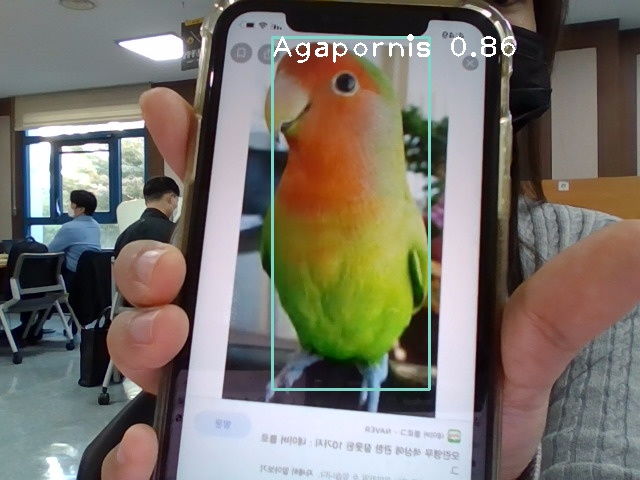

In [13]:
# 병렬로 실행하기 
display(stopButton) # stopbutton 먼저 보여준 뒤 
thread = threading.Thread(target=view, args=(stopButton,)) # 입력파라미터는 : stopbutton 
thread.start()

# 참고 사이트 
#https://abauville.medium.com/display-your-live-webcam-feed-in-a-jupyter-notebook-using-opencv-d01eb75921d1